In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='2020')
df2=df.iloc[:,2:16]
data=df.iloc[:,1:23]
data=data.drop(['Total','Crime Rate','Sex Ratio','Literacy','Density','Latitude','Longitude'], axis=1)
df2=df2.drop(['Total'], axis=1)
df2.head()
from sklearn import preprocessing
df_standardized = preprocessing.scale( df2 )
df1 = pd.DataFrame( df_standardized )


In [4]:
data.head()

District  Homicide/Murder  Causing death by negligence  Hurt  \
0  Ahmednagar              254                          620  1826   
1       Akola              114                          116  1345   
2    Amravati              201                          354  2133   
3   Aurangbad              139                          386  1869   
4        Beed              206                          308  1233   

   Assault on woman  Kidnapping and abduction  Human trafficking   Rape  \
0               543                       369                   0    92   
1               245                        76                   0    28   
2               461                       190                   0    97   
3               335                       242                   0    80   
4               248                        91                   0    50   

   Offence against public tranquility  Offences against property  \
0                                 905                       3104   
1                                 111                        946   
2                                 144                       2198   
3                                 428                       3821   
4                                 508                       1002   

   Offences relating to documents and property marks  Miscellaneous  Others  \
0                                                220          30535     221   
1                                                 86           4244     213   
2                                                250           3921     164   
3                                                265           4292     411   
4                                                104           1858     111   

   Population  cluster  
0     4543159        0  
1     1813906        1  
2     2888445        1  
3     3701282        1  
4     2585049        1

In [7]:
#Elbow Method
from sklearn.cluster import KMeans

#create a list for the wcss parameter
wcss = []
#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [35]:
#WCSS is the sum of squared distance between each point and the centroid in a cluster
#Within-Cluster-Sum-of-Squares (WCSS)
wcss

[455.0,
 183.1516390270706,
 121.00520284639019,
 77.72527132804296,
 57.19196898334106,
 43.204549529150555,
 33.50410783186294,
 27.82687074072203,
 22.57670687749462,
 19.703831936011067,
 16.477641547770464,
 13.851069756261888,
 11.696519258289692,
 9.585075372115796]

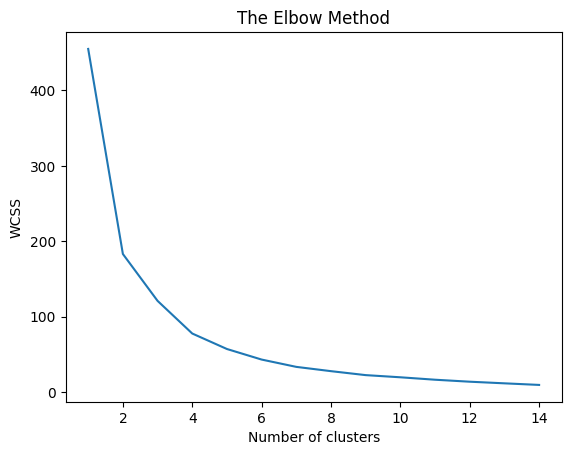

In [9]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
import seaborn as sns

In [11]:
#Silhouette Method
from sklearn.metrics import silhouette_score

sil = []
kmax = 14

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df1)
  labels = kmeans.labels_
  sil.append(silhouette_score(df1, labels, metric = 'euclidean'))

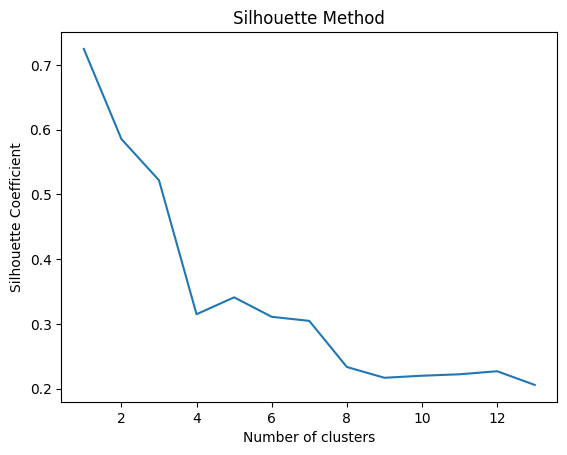

In [12]:
plt.plot(range(1, 14), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [13]:
#K-Means Clustering using k=6
km=KMeans(n_clusters=6)
y_pred=km.fit_predict(df1)

In [14]:
y_pred

array([3, 5, 1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 2, 3, 1, 5, 3, 5,
       5, 5, 4, 5, 5, 1, 1, 5, 3, 0, 5, 5, 1])

In [15]:
df['cluster']=y_pred
df.head()

SrNo    District  Homicide/Murder  Causing death by negligence  Hurt  \
0     1  Ahmednagar              254                          620  1826   
1     2       Akola              114                          116  1345   
2     3    Amravati              201                          354  2133   
3     4   Aurangbad              139                          386  1869   
4     5        Beed              206                          308  1233   

   Assault on woman  Kidnapping and abduction  Human trafficking   Rape  \
0               543                       369                   0    92   
1               245                        76                   0    28   
2               461                       190                   0    97   
3               335                       242                   0    80   
4               248                        91                   0    50   

   Offence against public tranquility  ...  Others  Total  Population  \
0                                 905  ...     221  38689     4543159   
1                                 111  ...     213   7524     1813906   
2                                 144  ...     164  10113     2888445   
3                                 428  ...     411  12268     3701282   
4                                 508  ...     111   5719     2585049   

   Crime Rate  Sex Ratio  Literacy  Density   Latitude  Longitude  cluster  
0    0.851588        939    0.7905      266  19.094829  74.747979        3  
1    0.414795        946    0.8805      320  20.700216  77.008168        5  
2    0.350119        951    0.8738      237  20.931982  77.752304        1  
3    0.331453        923    0.7902      366  19.876165  75.343314        1  
4    0.221234        916    0.7699      242  18.990088  75.753132        1  

[5 rows x 23 columns]

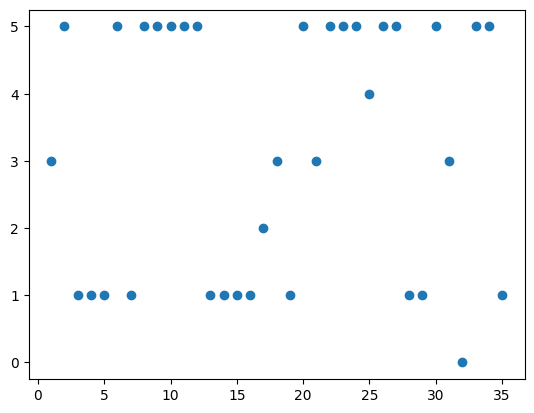

In [16]:
plt.scatter(df['SrNo'],df['cluster'])
#for col in df.columns:
 #   print(col)

In [17]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [18]:
z = linkage(df1, method="complete",metric="euclidean")

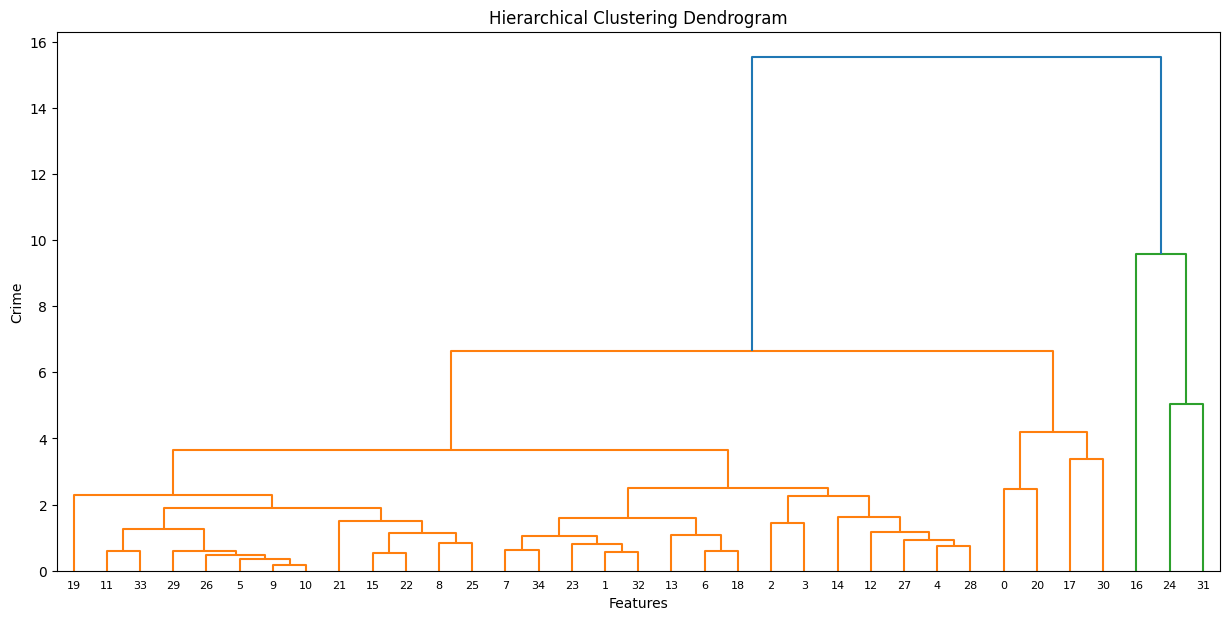

In [19]:
plt.figure(figsize=(15,7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [20]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx', sheet_name='your Excel sheet name')

In [21]:
X = df2[['Homicide/Murder','Causing death by negligence','Hurt','Assault on woman','Kidnapping and abduction','Human trafficking ','Rape','Offence against public tranquility','Offences against property','Offences relating to documents and property marks','Miscellaneous','Others']]
clusters = KMeans(6)  # 6 clusters
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df2['Crime_clusters'] = clusters.labels_
df2.head()
df2.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

Homicide/Murder  Causing death by negligence  Hurt  Assault on woman  \
0              254                          620  1826               543   
1              114                          116  1345               245   
2              201                          354  2133               461   
3              139                          386  1869               335   
4              206                          308  1233               248   

   Kidnapping and abduction  Human trafficking   Rape  \
0                       369                   0    92   
1                        76                   0    28   
2                       190                   0    97   
3                       242                   0    80   
4                        91                   0    50   

   Offence against public tranquility  Offences against property  \
0                                 905                       3104   
1                                 111                        946   
2                                 144                       2198   
3                                 428                       3821   
4                                 508                       1002   

   Offences relating to documents and property marks  Miscellaneous  Others  
0                                                220          30535     221  
1                                                 86           4244     213  
2                                                250           3921     164  
3                                                265           4292     411  
4                                                104           1858     111

In [22]:
stats =df2.sort_values("Hurt", ascending=True)
stats

Homicide/Murder  Causing death by negligence  Hurt  Assault on woman  \
29               18                           50   241                53   
26               39                          106   250                53   
19               62                          133   255                44   
9                65                          135   303                55   
10               50                          131   311                57   
25               47                          191   334                77   
8                84                          352   433                80   
21               79                          232   466               158   
5                41                          141   486                88   
11               75                          119   649                73   
22               92                          253   847               123   
33              114                          110   855               163   
12              192                          439   901               259   
28              145                          359  1017               275   
14              146                          313  1020               263   
15              104                          244  1077               138   
7               105                          234  1147               194   
23              165                          121  1227               139   
4               206                          308  1233               248   
27              207                          269  1344               250   
1               114                          116  1345               245   
32               86                          170  1394               197   
34              140                          310  1431               187   
13              133                          209  1436               208   
20              240                          917  1720               384   
18              143                          252  1778               232   
0               254                          620  1826               543   
3               139                          386  1869               335   
6               122                          293  2099               313   
2               201                          354  2133               461   
17              299                          581  2252               386   
30              246                          461  2437               449   
31              336                          814  3187               746   
24              649                         1102  3540               936   
16              521                          349  4171              1553   

    Kidnapping and abduction  Human trafficking   Rape  \
29                        18                   0     6   
26                        43                   0    11   
19                        57                   0    17   
9                         32                   0    17   
10                        40                   0    18   
25                        73                   0    20   
8                         98                   1    14   
21                       217                   4    62   
5                         71                   0    16   
11                        27                   0    15   
22                        87                   0    21   
33                        66                   0    24   
12                       187                   0    34   
28                       192                   2    49   
14                       150                  15    54   
15                       111                   3    26   
7                        152                   1    46   
23                        65                   0    33   
4                         91                   0    50   
27                       228                   2    39   
1                         76                   0 

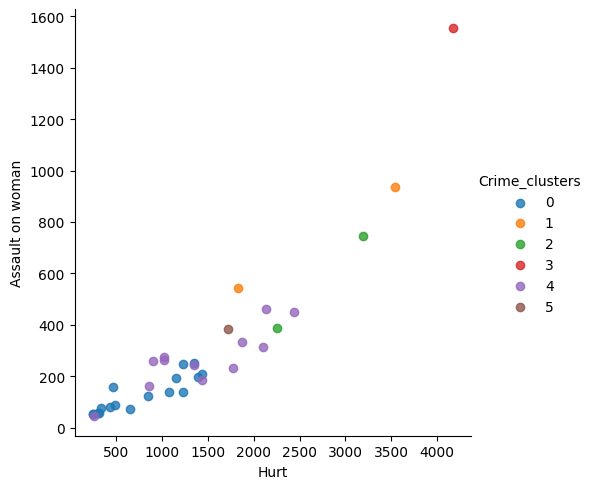

In [23]:
sns.lmplot(x='Hurt',y='Assault on woman',data=df2,hue = 'Crime_clusters',fit_reg=False);

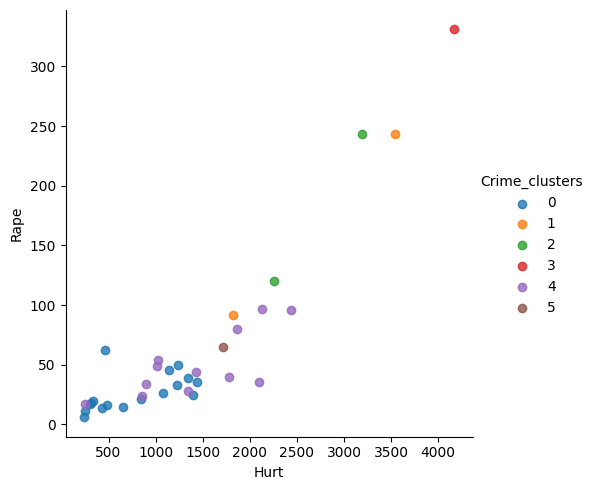

In [24]:
sns.lmplot(x='Hurt',y='Rape',data=df2,hue = 'Crime_clusters',fit_reg=False);

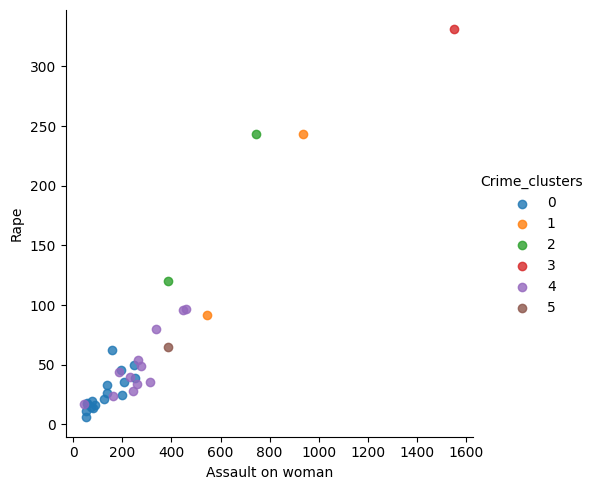

In [25]:
sns.lmplot(x='Assault on woman',y='Rape',data=df2,hue = 'Crime_clusters',fit_reg=False);

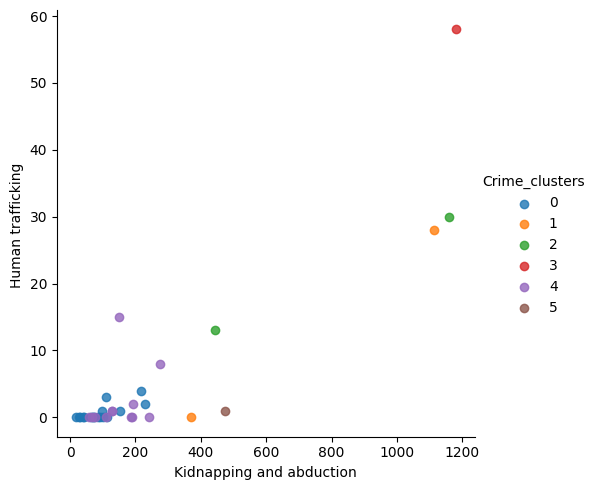

In [26]:
sns.lmplot(x='Kidnapping and abduction',y='Human trafficking ',data=df2,hue = 'Crime_clusters',fit_reg=False);

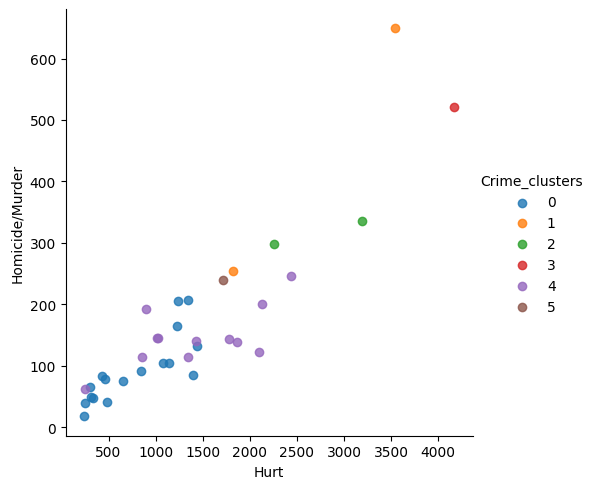

In [27]:
sns.lmplot(x='Hurt',y='Homicide/Murder',data=df2,hue = 'Crime_clusters',fit_reg=False);

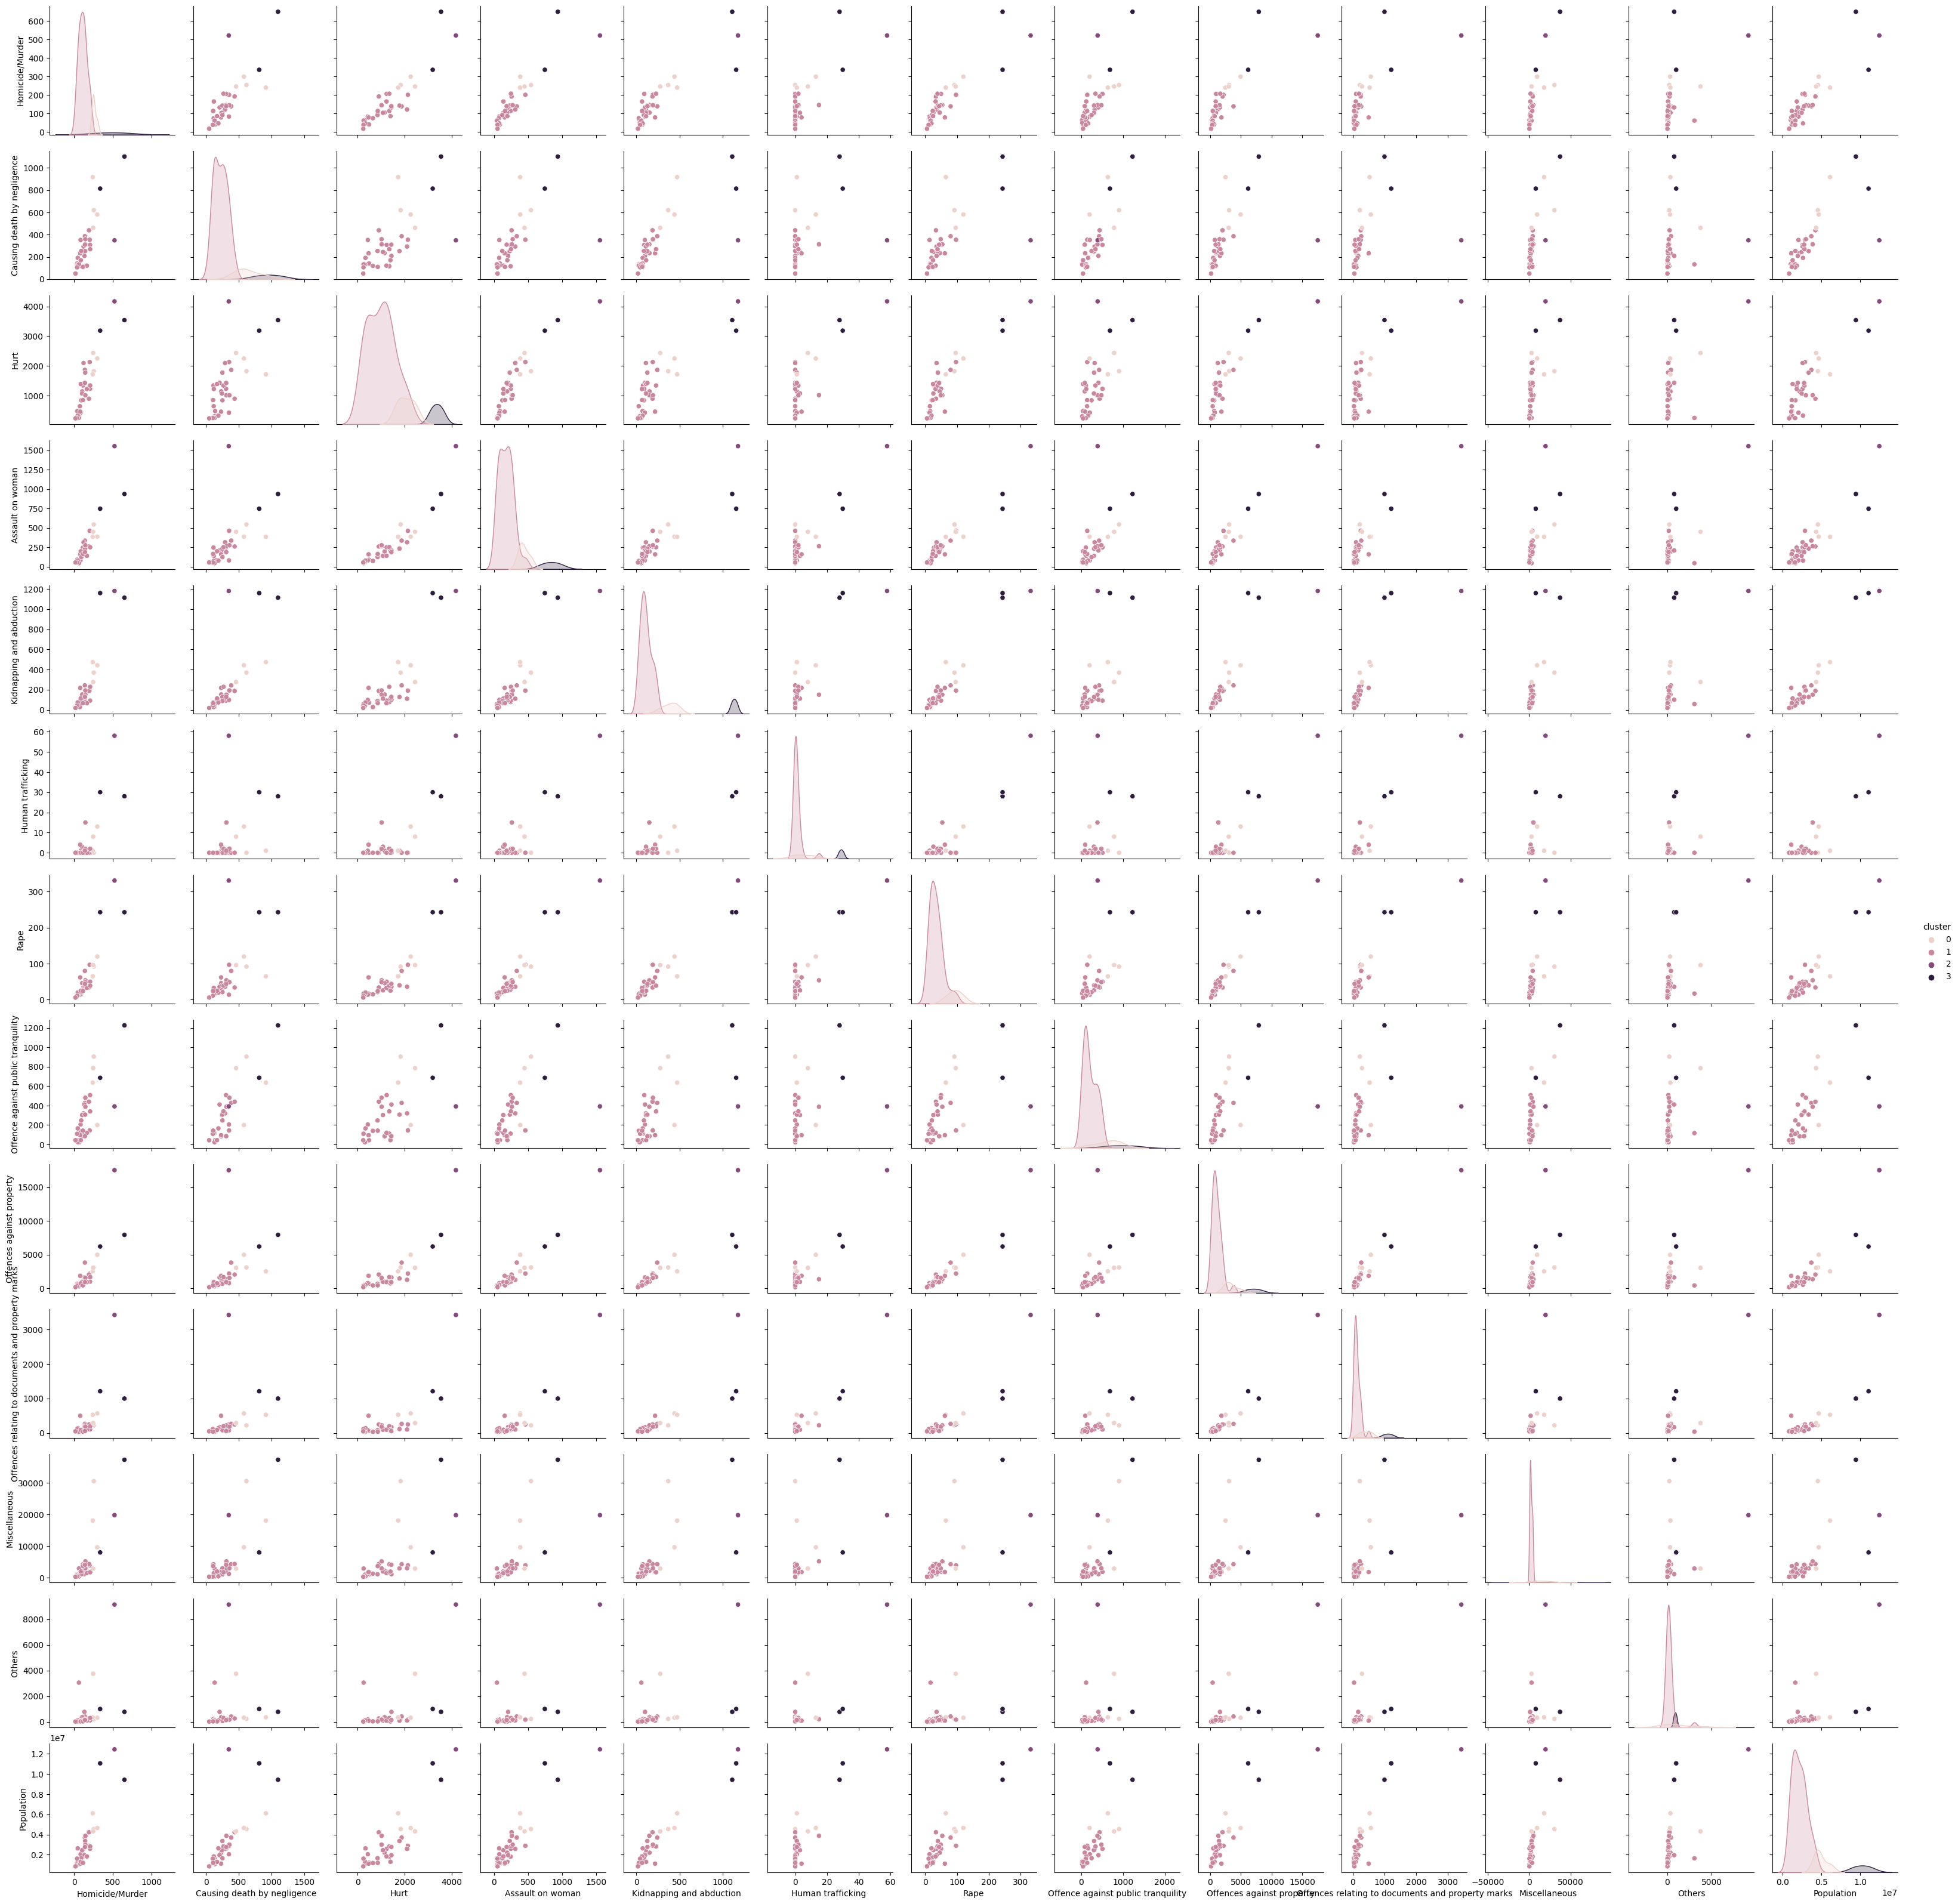

In [28]:
sns.pairplot(data,hue='cluster')

<AxesSubplot: ylabel='Density'>

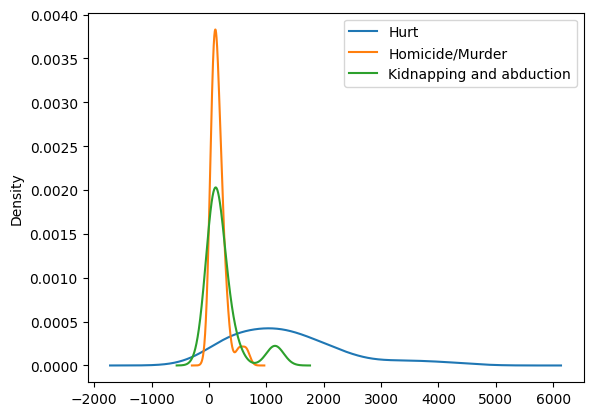

In [29]:
df3 = pd.DataFrame(data=df2, columns=['Hurt', 'Homicide/Murder', 'Kidnapping and abduction'])
df3.plot.kde()
#kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset

In [30]:
df2.head()

Homicide/Murder  Causing death by negligence  Hurt  Assault on woman  \
0              254                          620  1826               543   
1              114                          116  1345               245   
2              201                          354  2133               461   
3              139                          386  1869               335   
4              206                          308  1233               248   

   Kidnapping and abduction  Human trafficking   Rape  \
0                       369                   0    92   
1                        76                   0    28   
2                       190                   0    97   
3                       242                   0    80   
4                        91                   0    50   

   Offence against public tranquility  Offences against property  \
0                                 905                       3104   
1                                 111                        946   
2                                 144                       2198   
3                                 428                       3821   
4                                 508                       1002   

   Offences relating to documents and property marks  Miscellaneous  Others  \
0                                                220          30535     221   
1                                                 86           4244     213   
2                                                250           3921     164   
3                                                265           4292     411   
4                                                104           1858     111   

   Population  Crime_clusters  
0     4543159               1  
1     1813906               4  
2     2888445               4  
3     3701282               4  
4     2585049               0

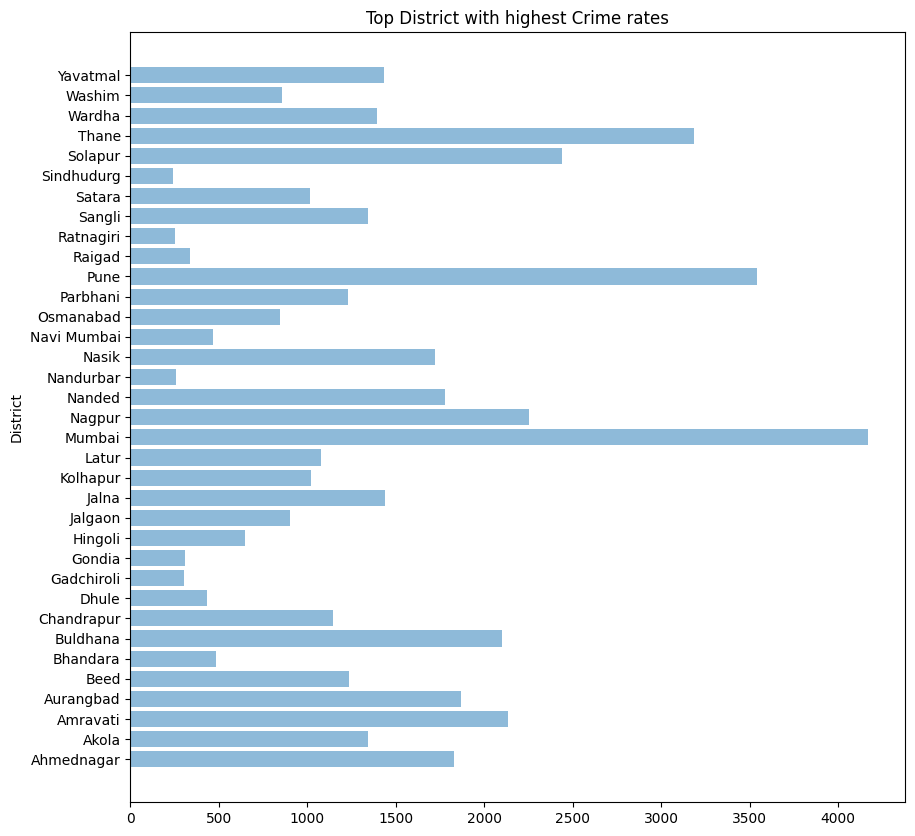

In [31]:
a1=data['Hurt']
b1=data['District']
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.barh(b1, a1, align='center', alpha=0.5)
plt.ylabel('District')
plt.title('Top District with highest Crime rates')
plt.show()

C:\Python\Python3102\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 640x480 with 0 Axes>

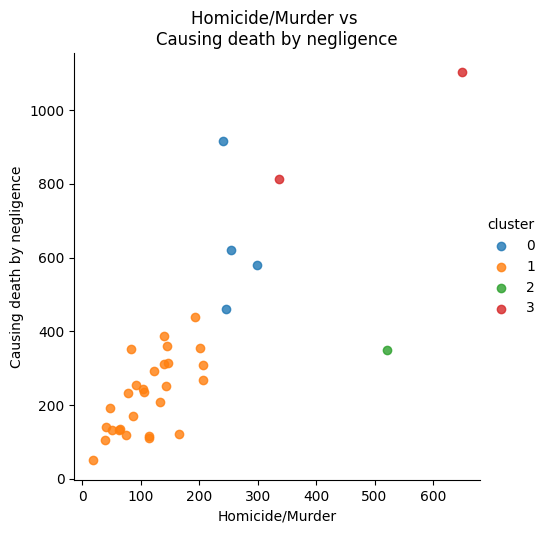

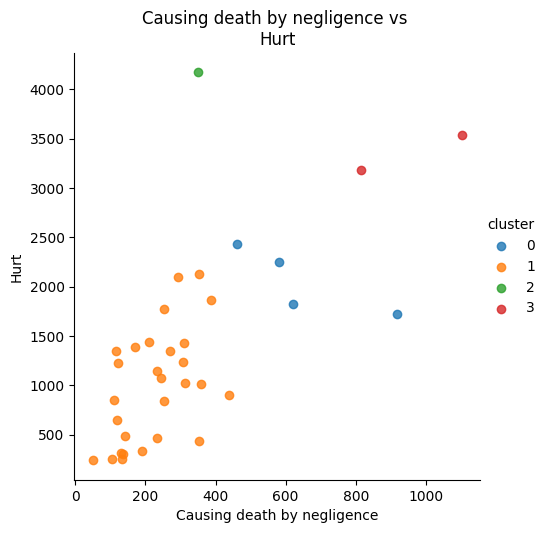

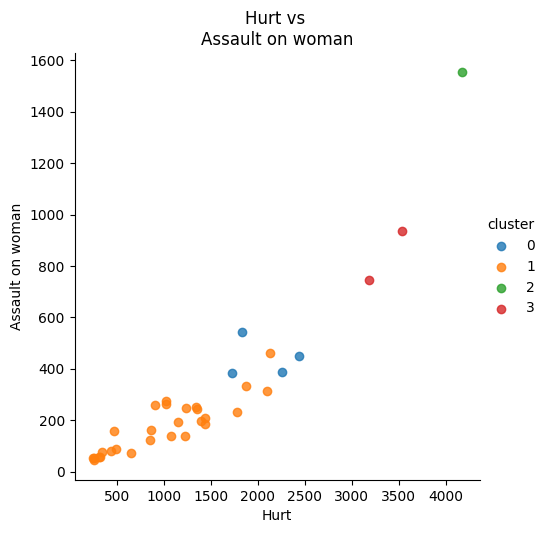

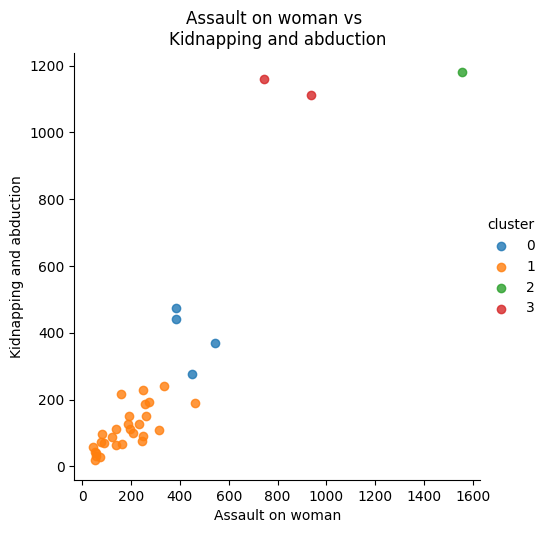

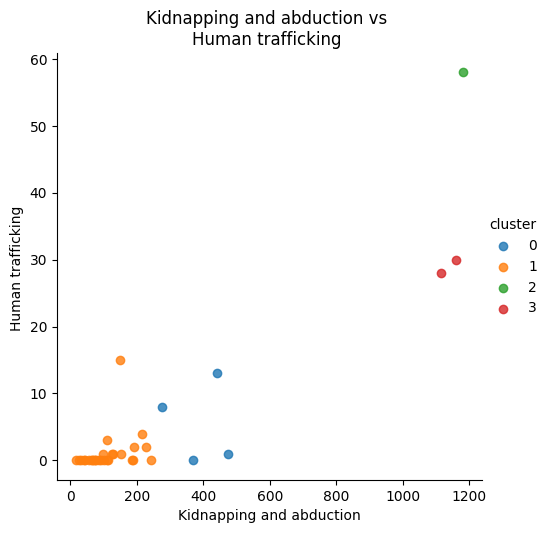

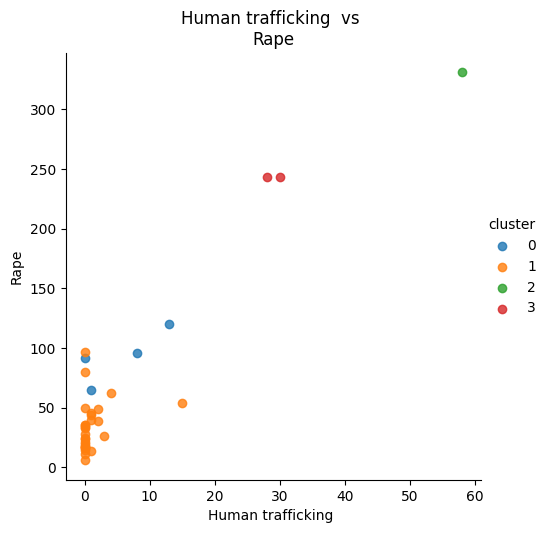

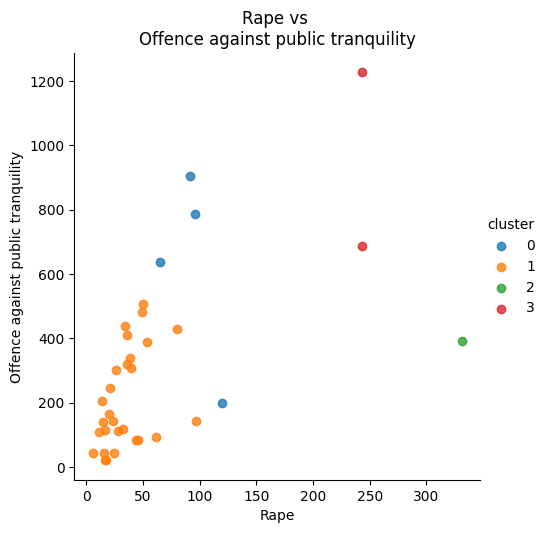

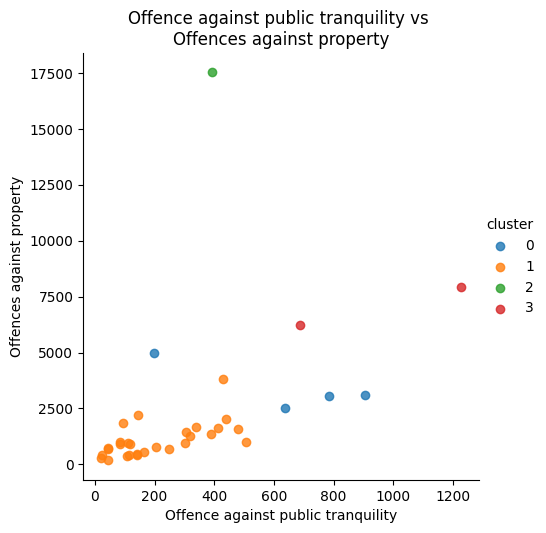

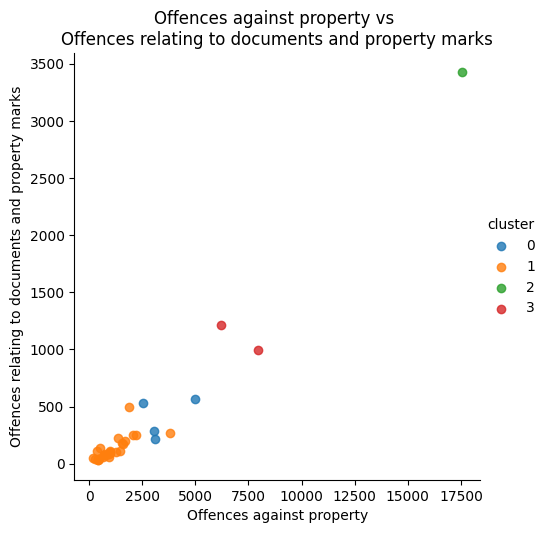

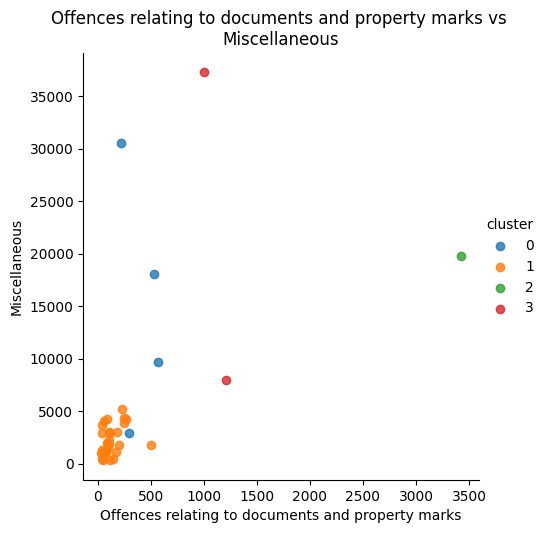

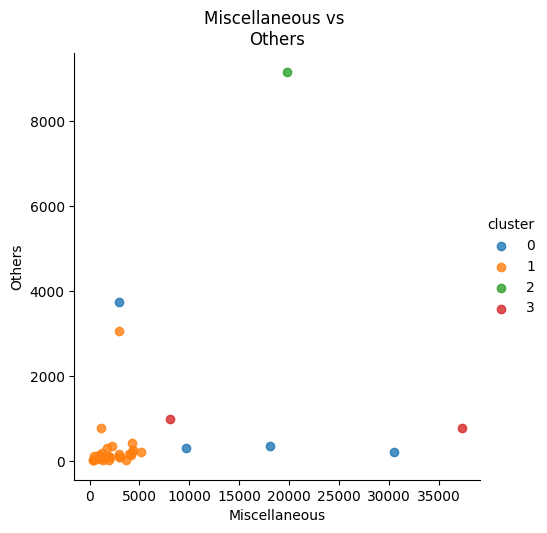

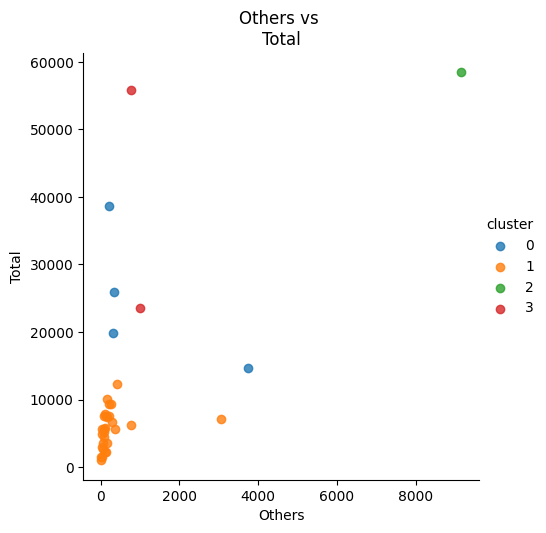

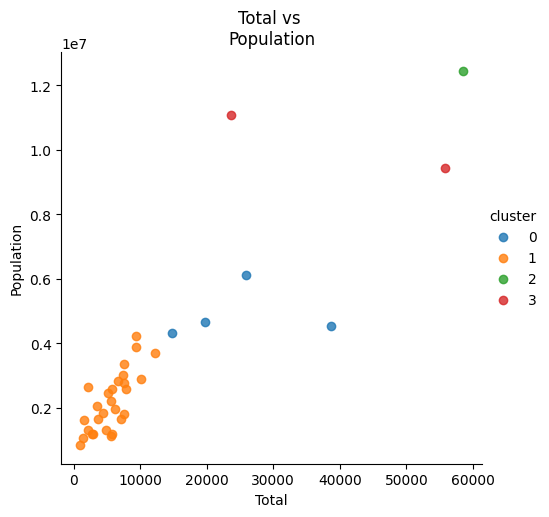

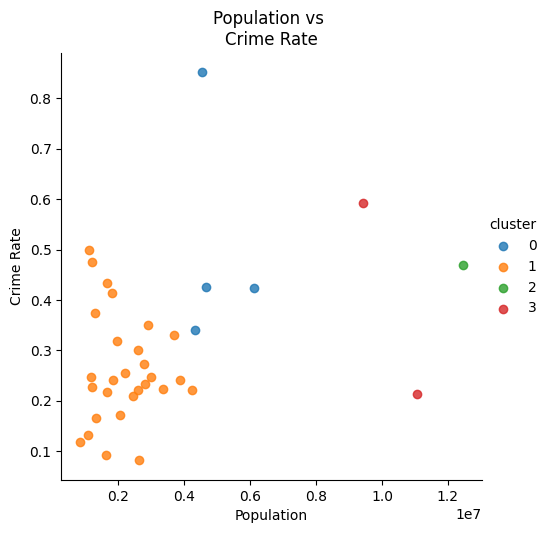

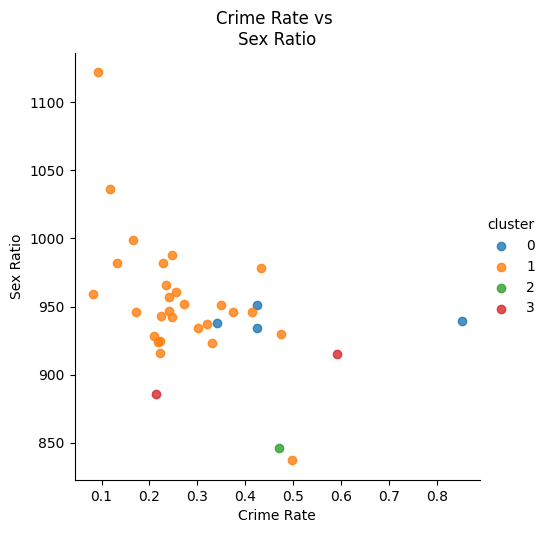

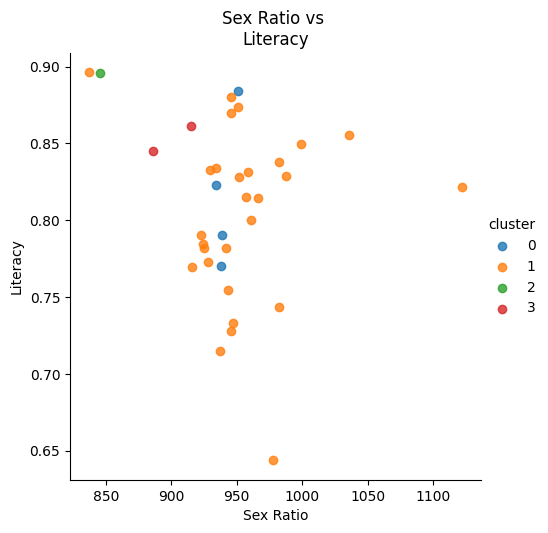

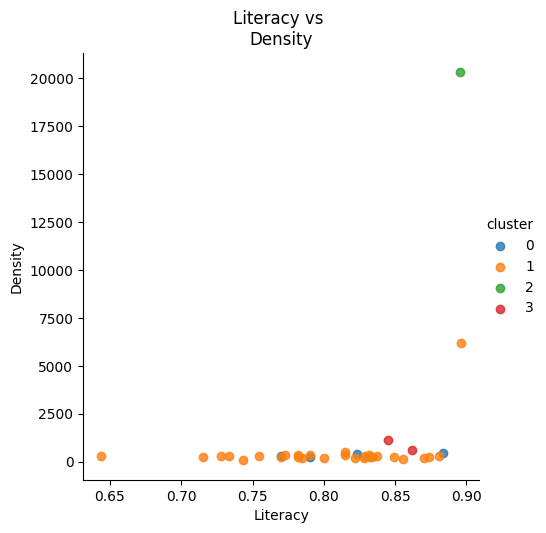

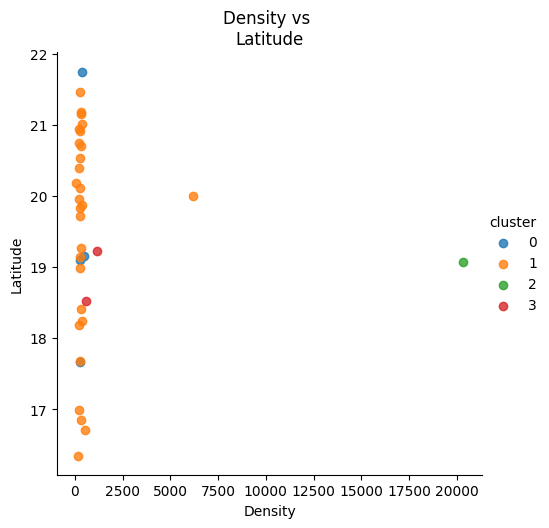

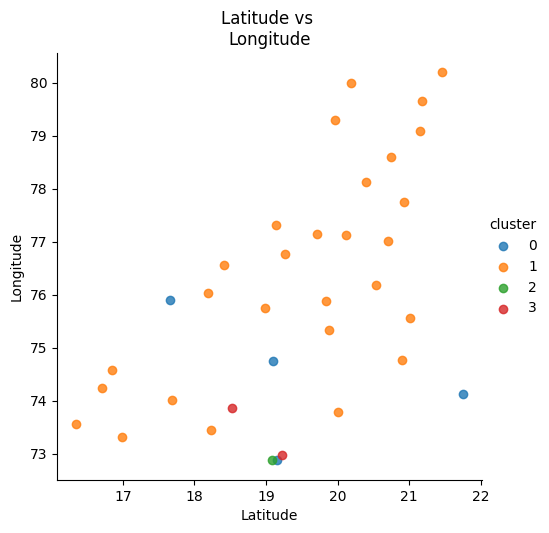

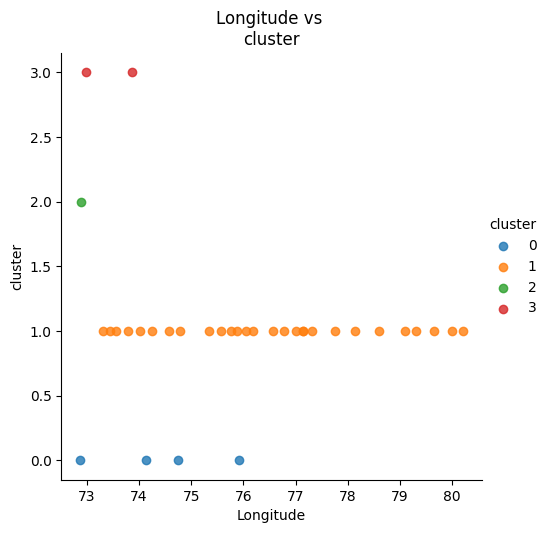

In [32]:
#Cluster plotting of crime vs crime/diff metrics
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='2020')
df2=df.iloc[:,2:23]
for i in range(len(df2.columns)-1):
    titles=df2.columns[i]+" vs \n"+df2.columns[i+1]
    plt.figure(i)
    sns.lmplot(x=df2.columns[i],y=df2.columns[i+1],data=df2,hue="cluster",legend=1,fit_reg=False).set(title=titles)


C:\Users\A_R_COMPUTERS\AppData\Local\Temp\ipykernel_5568\3855337537.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(20,10),dpi=80,facecolor='w',edgecolor='k')


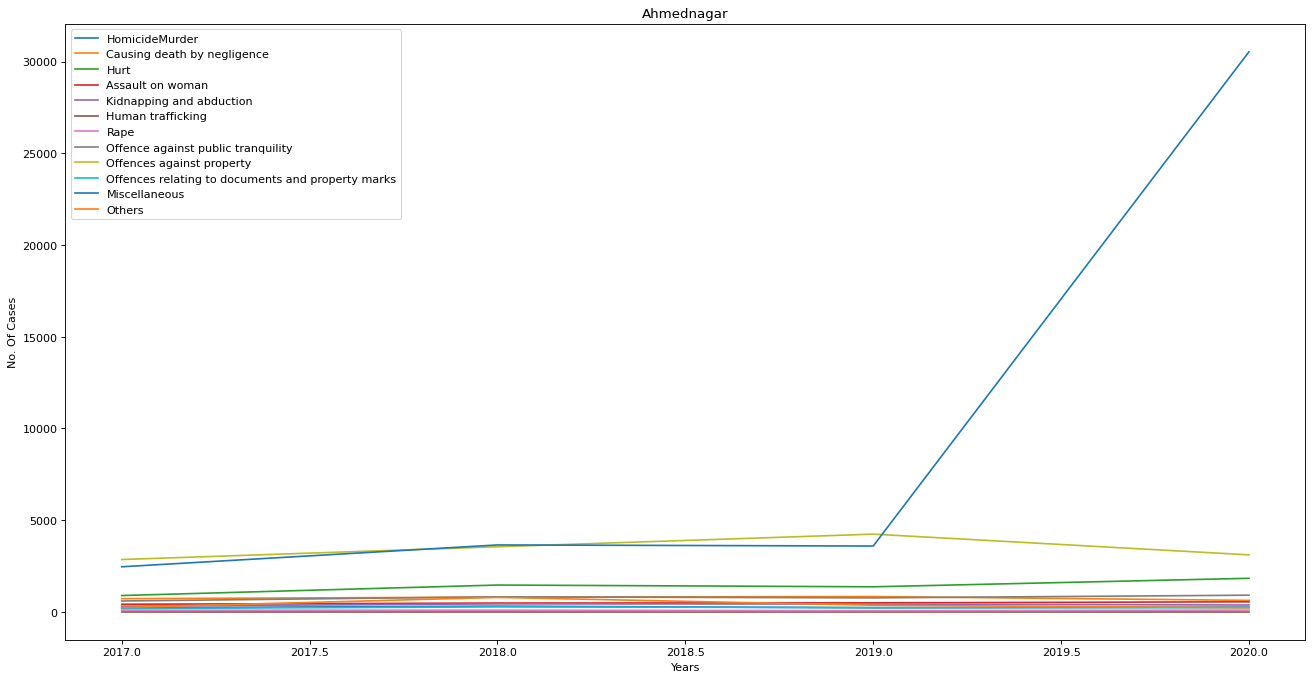

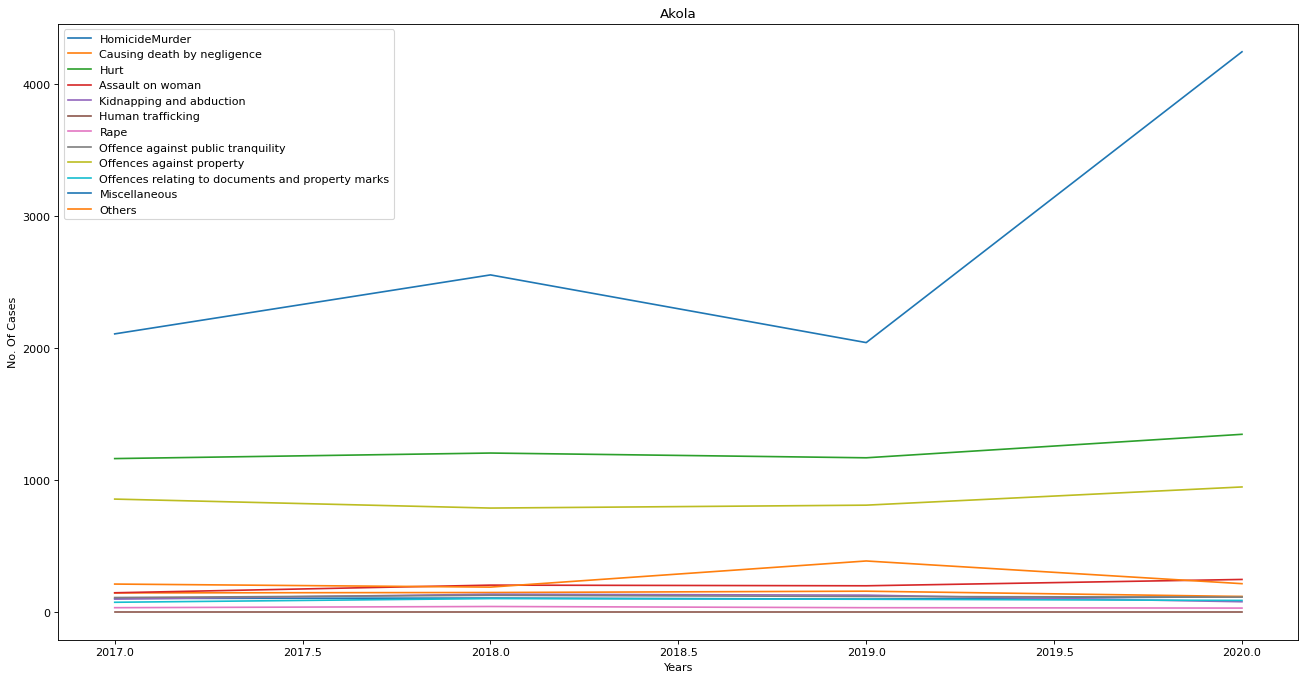

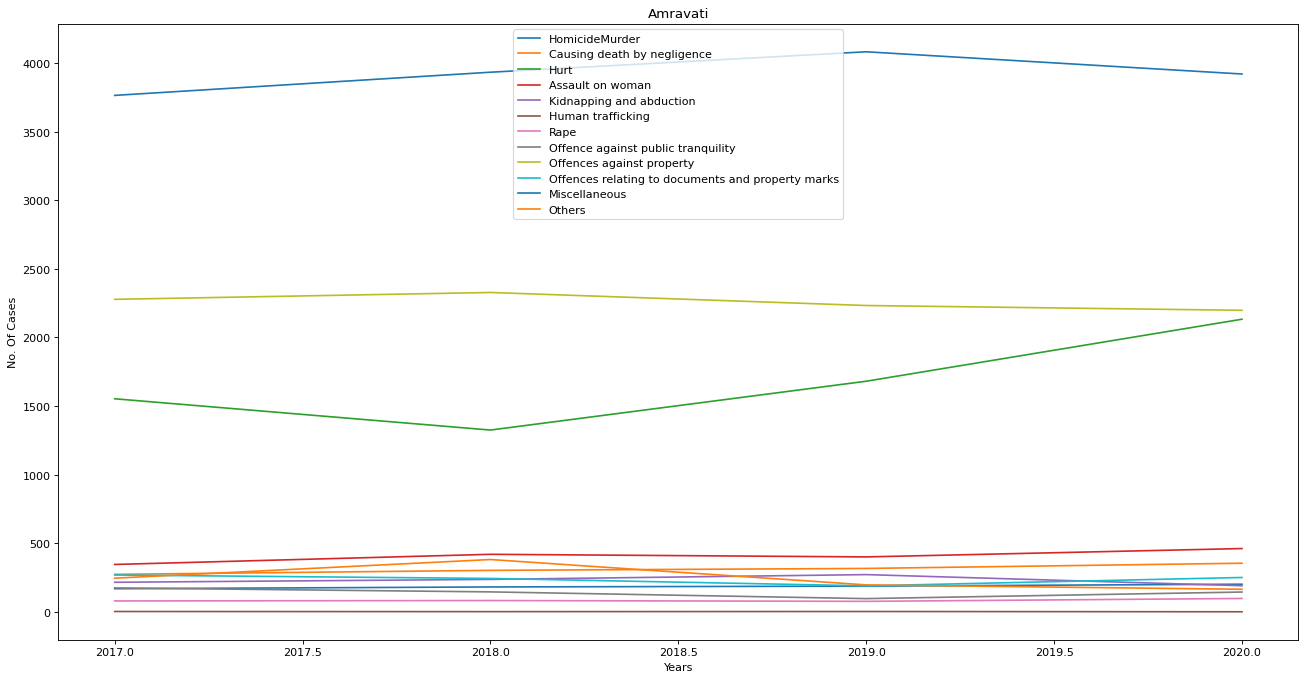

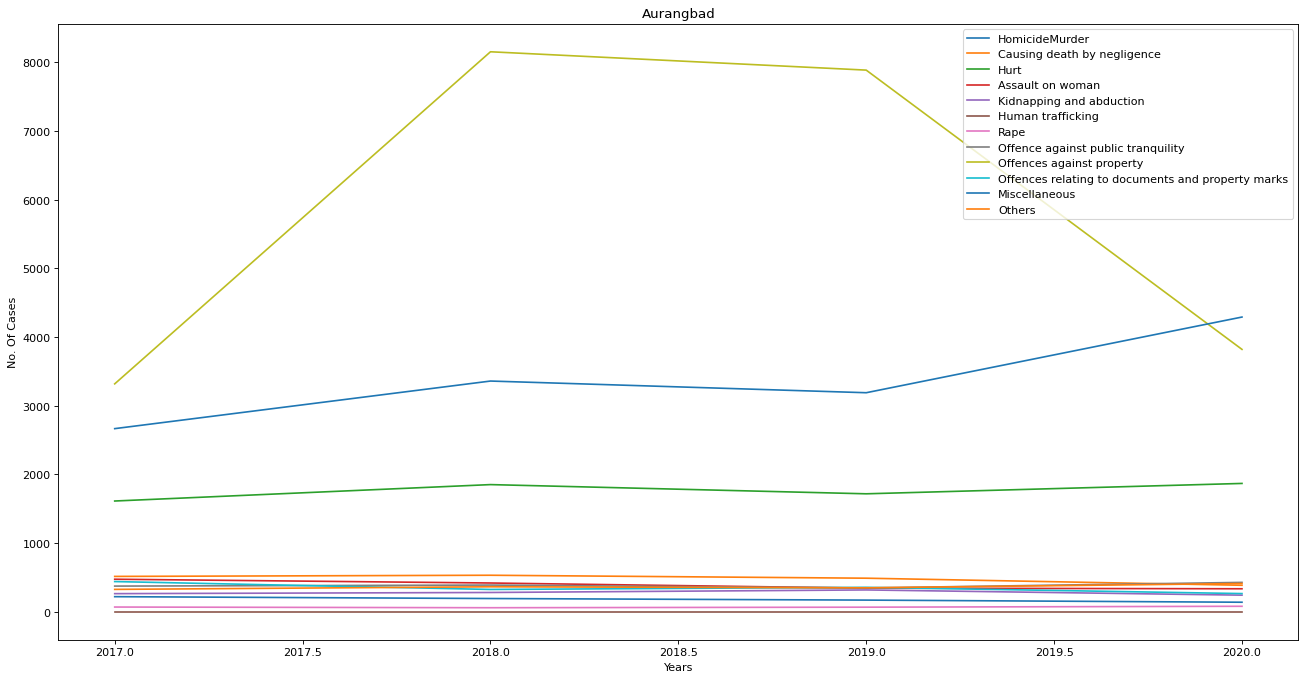

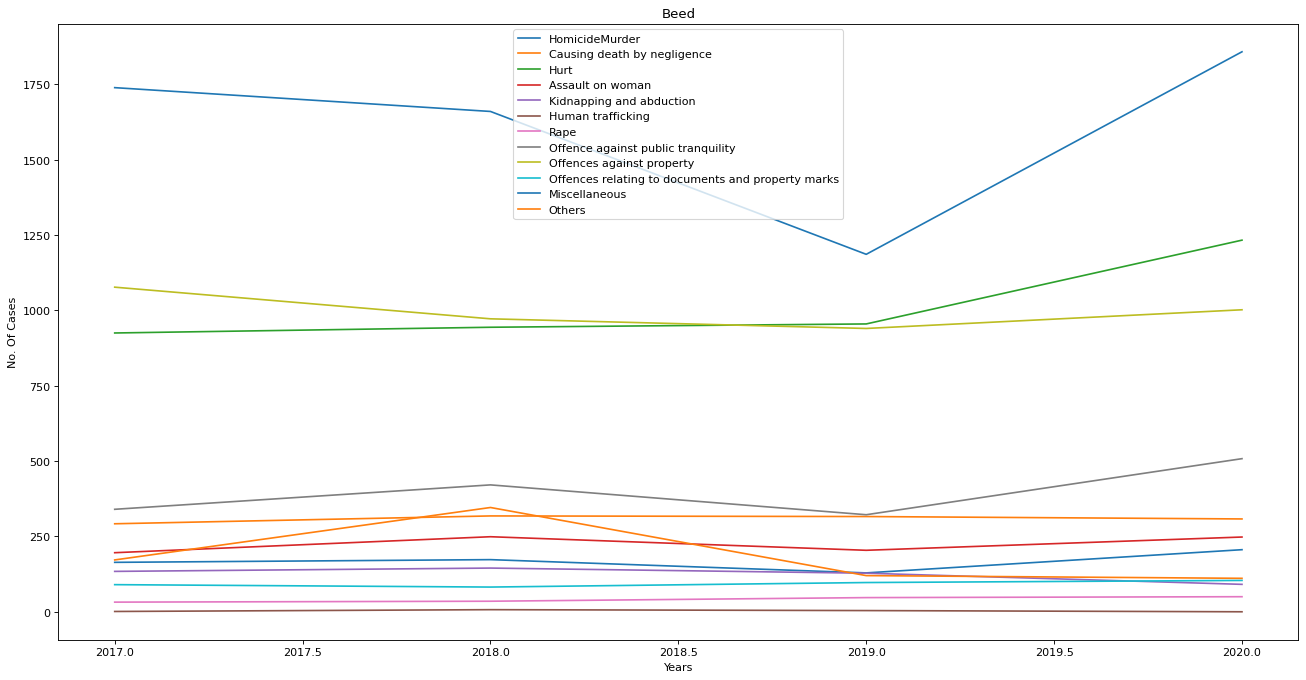

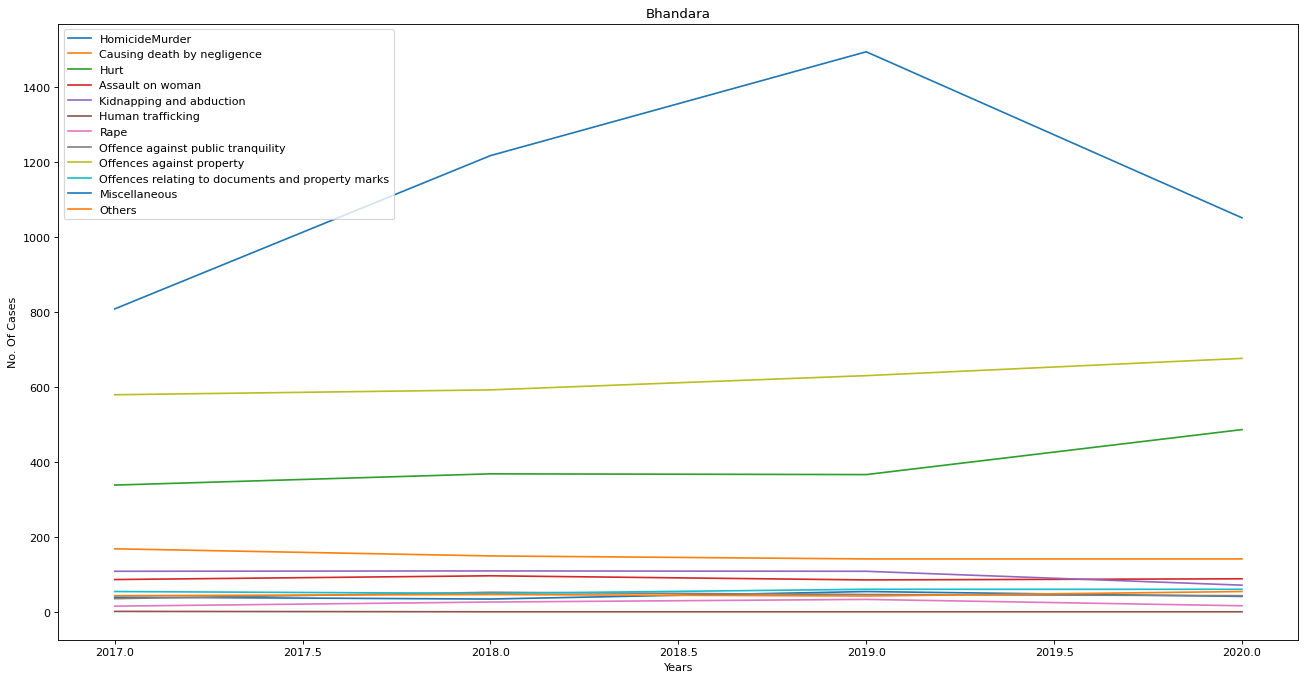

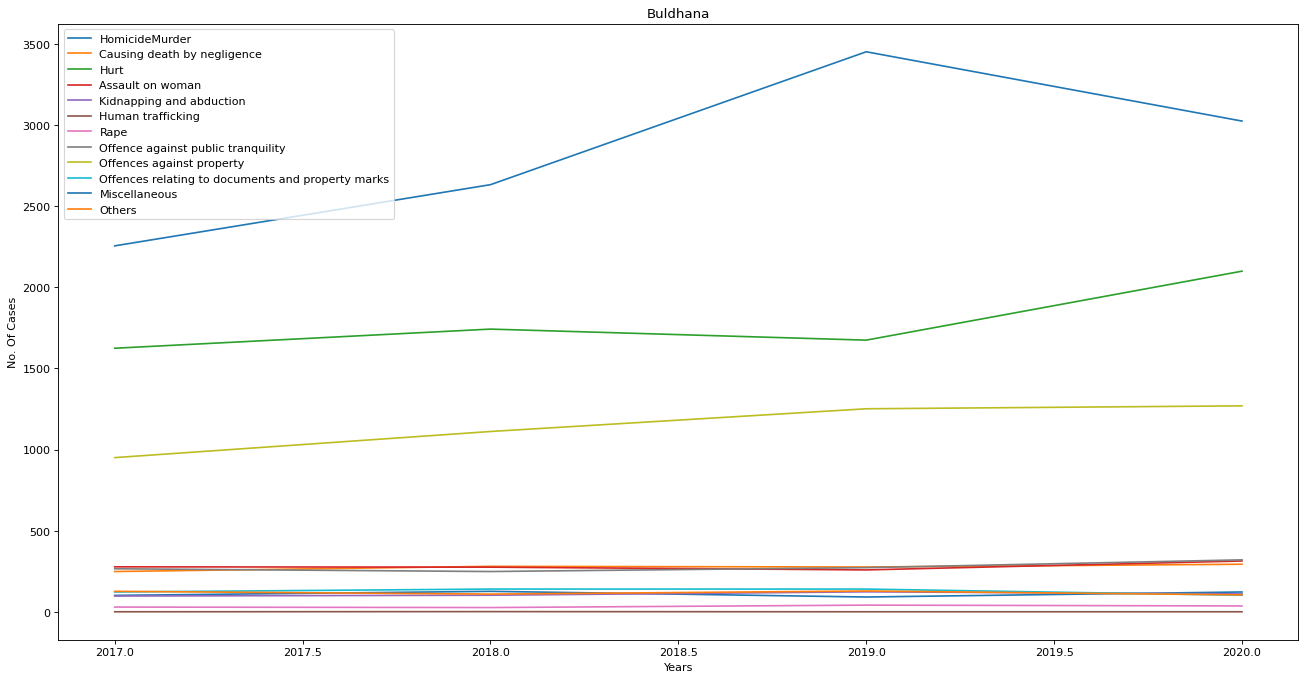

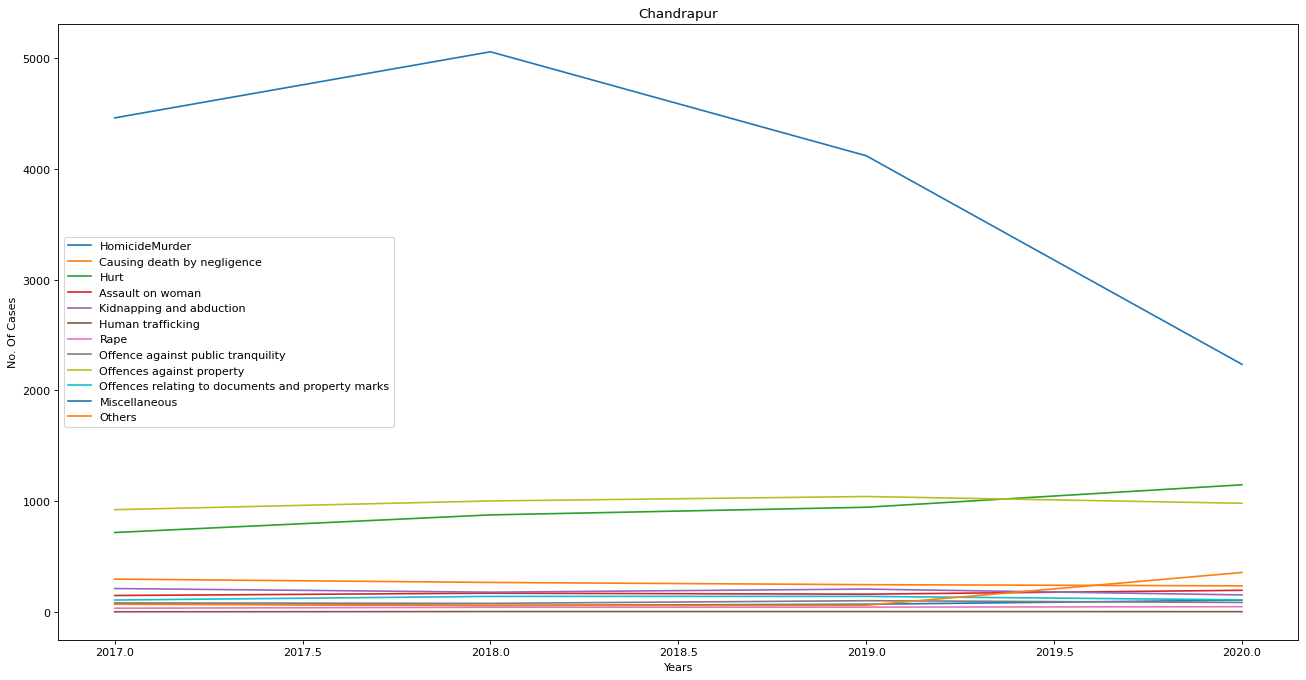

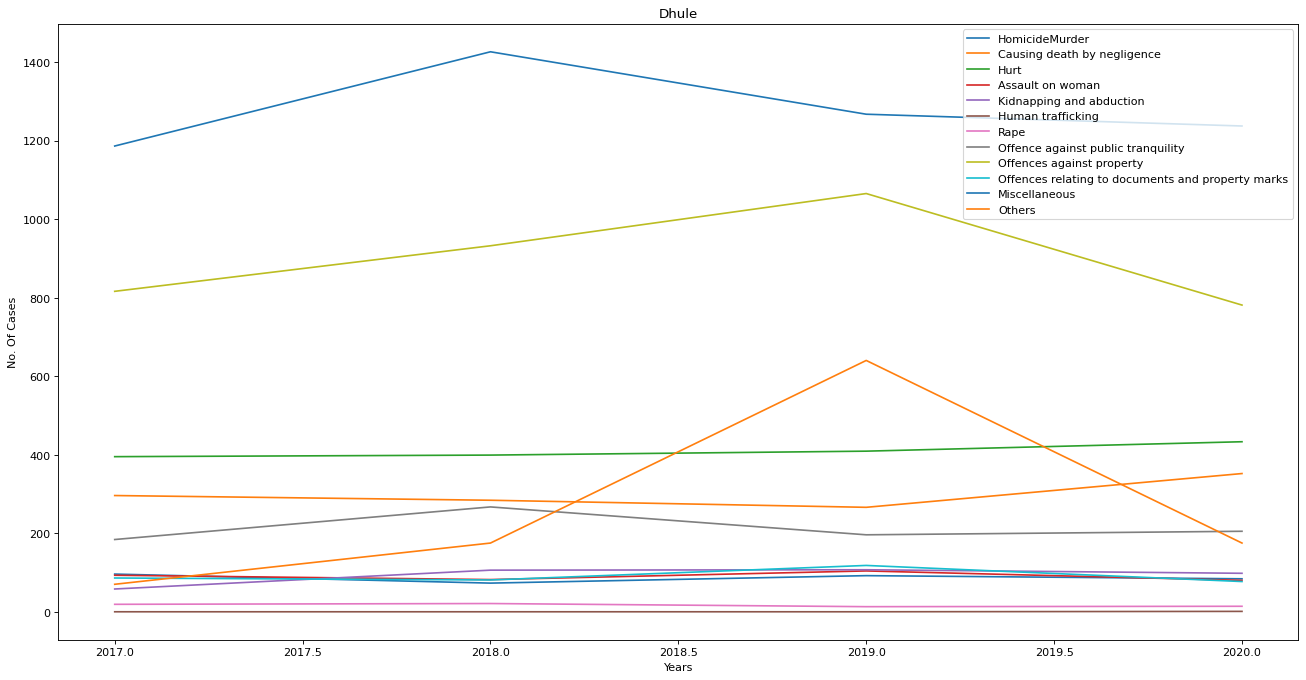

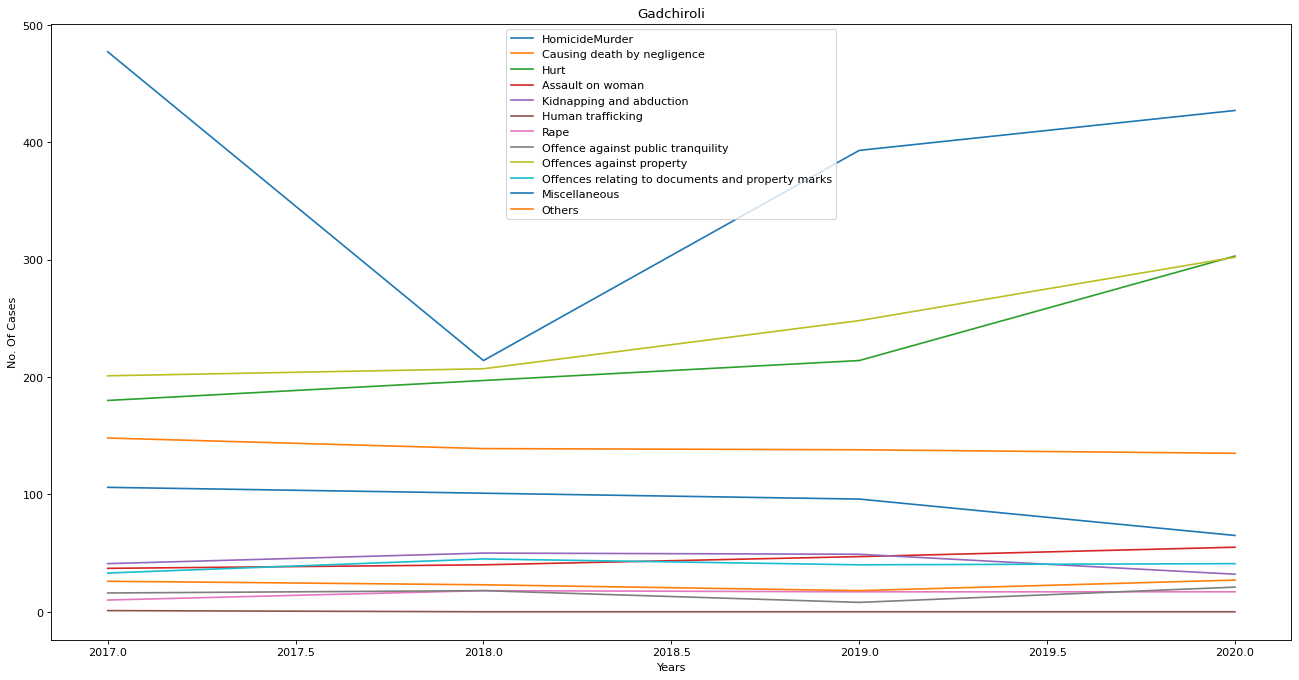

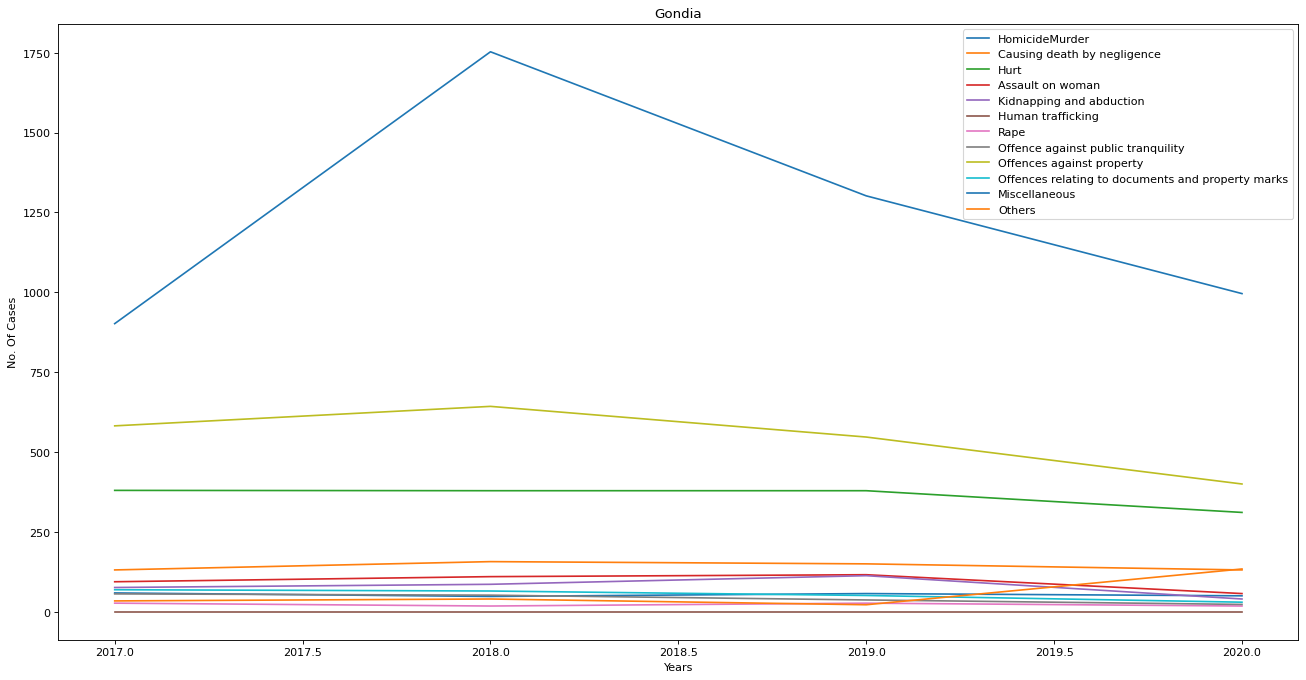

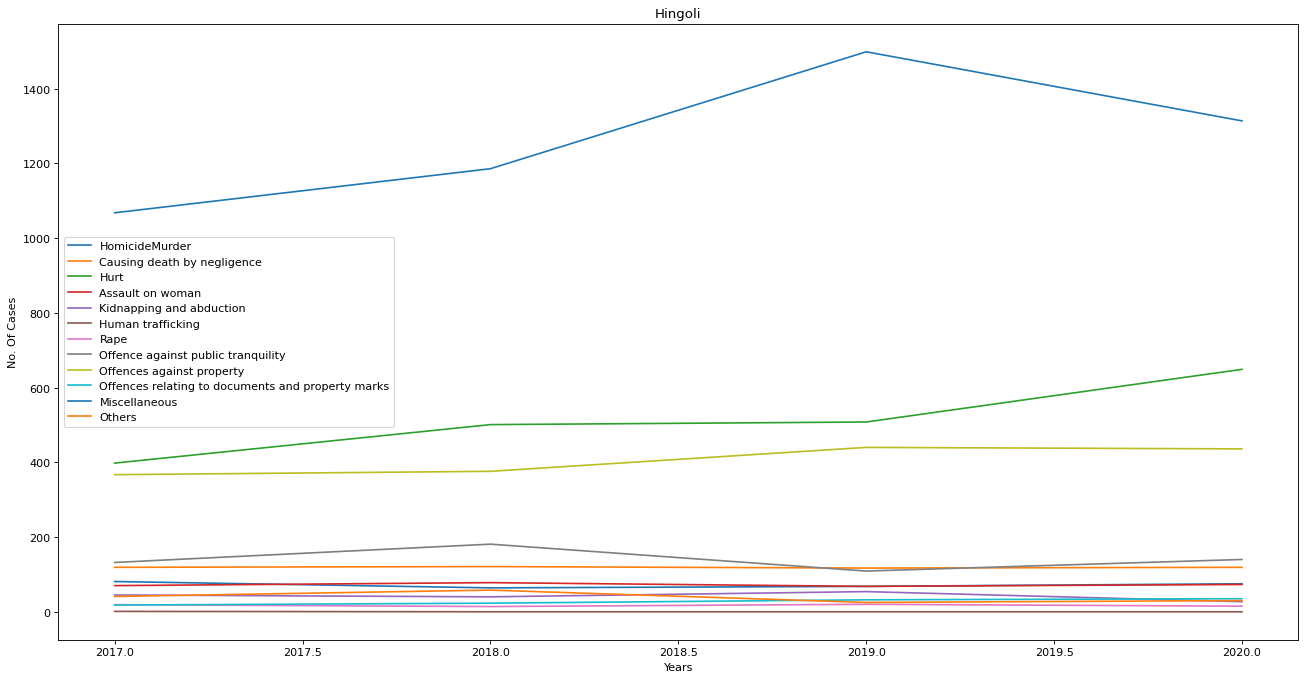

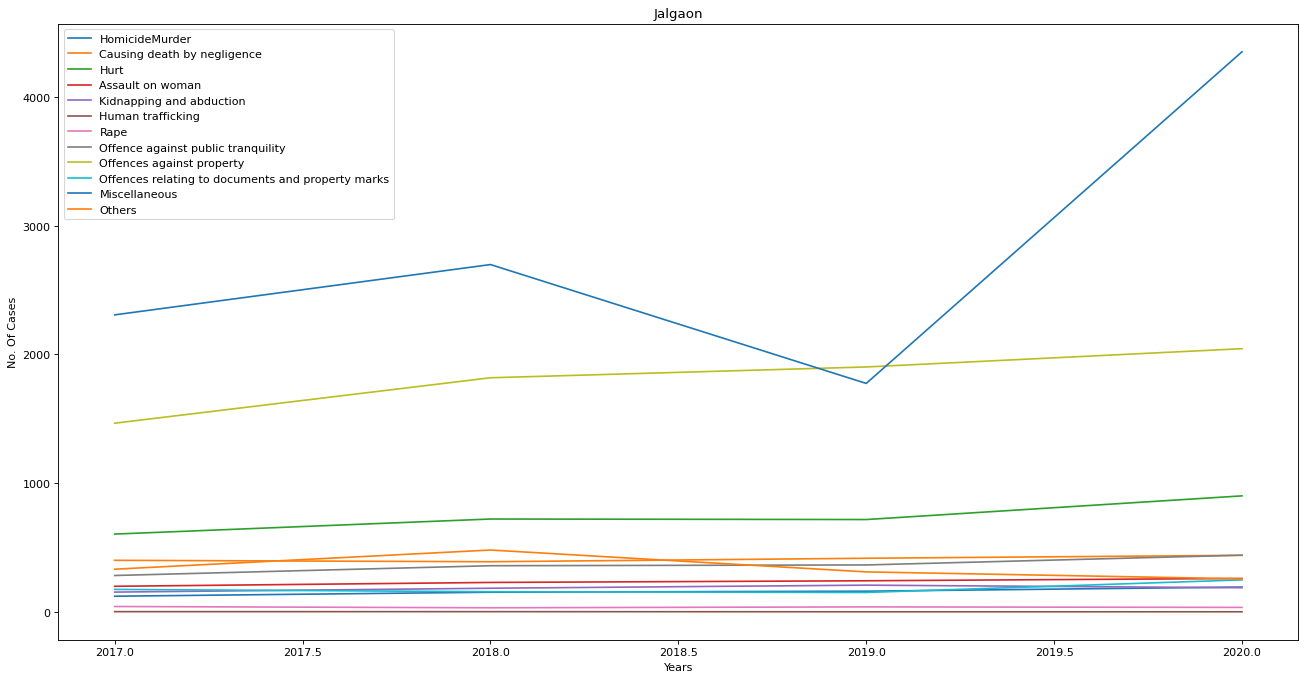

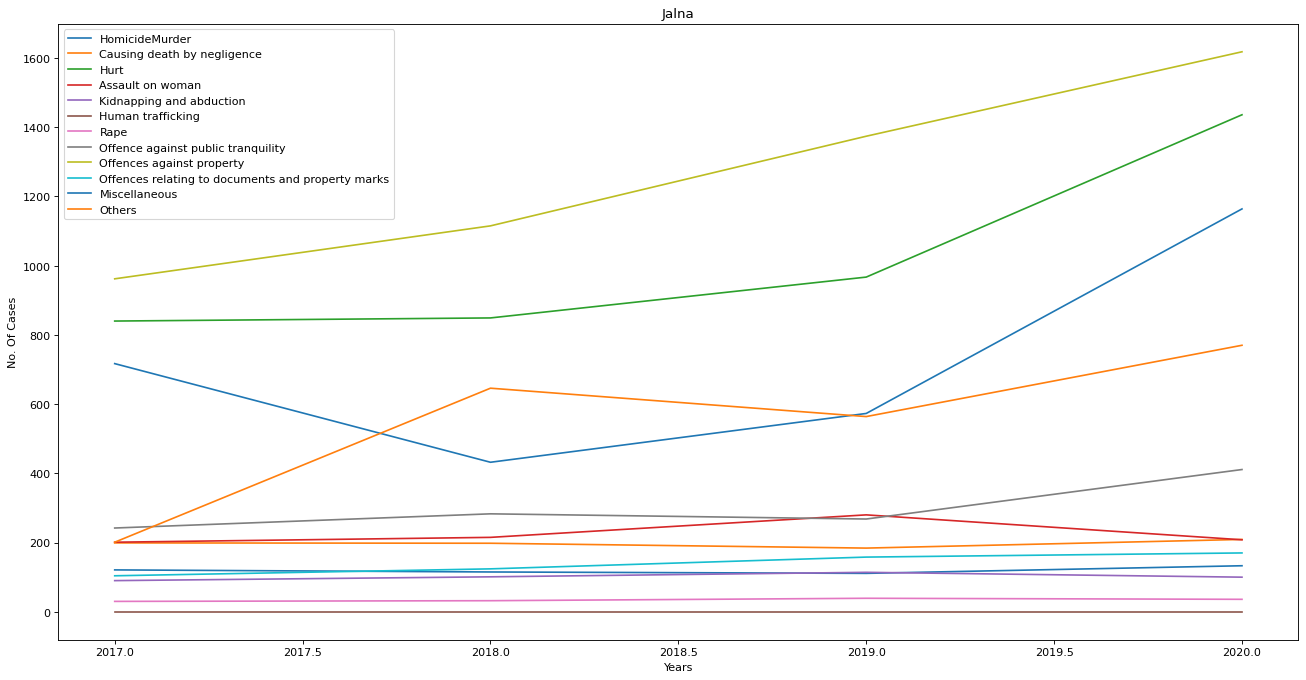

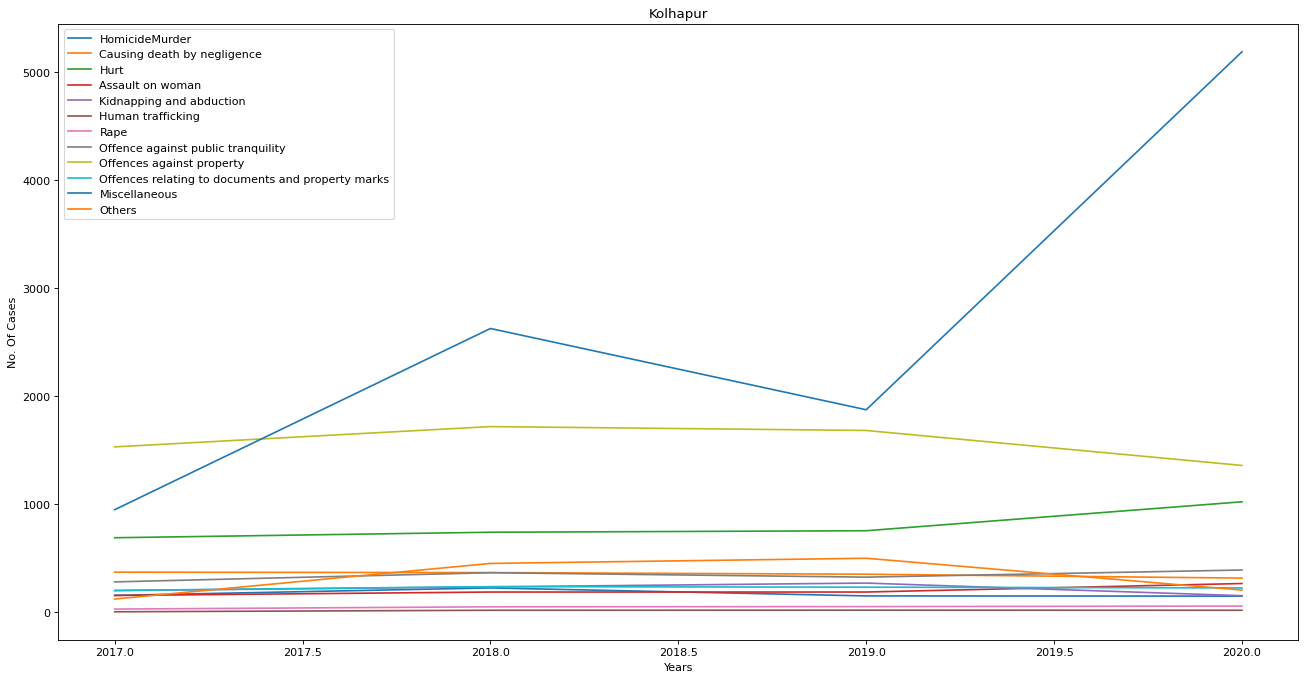

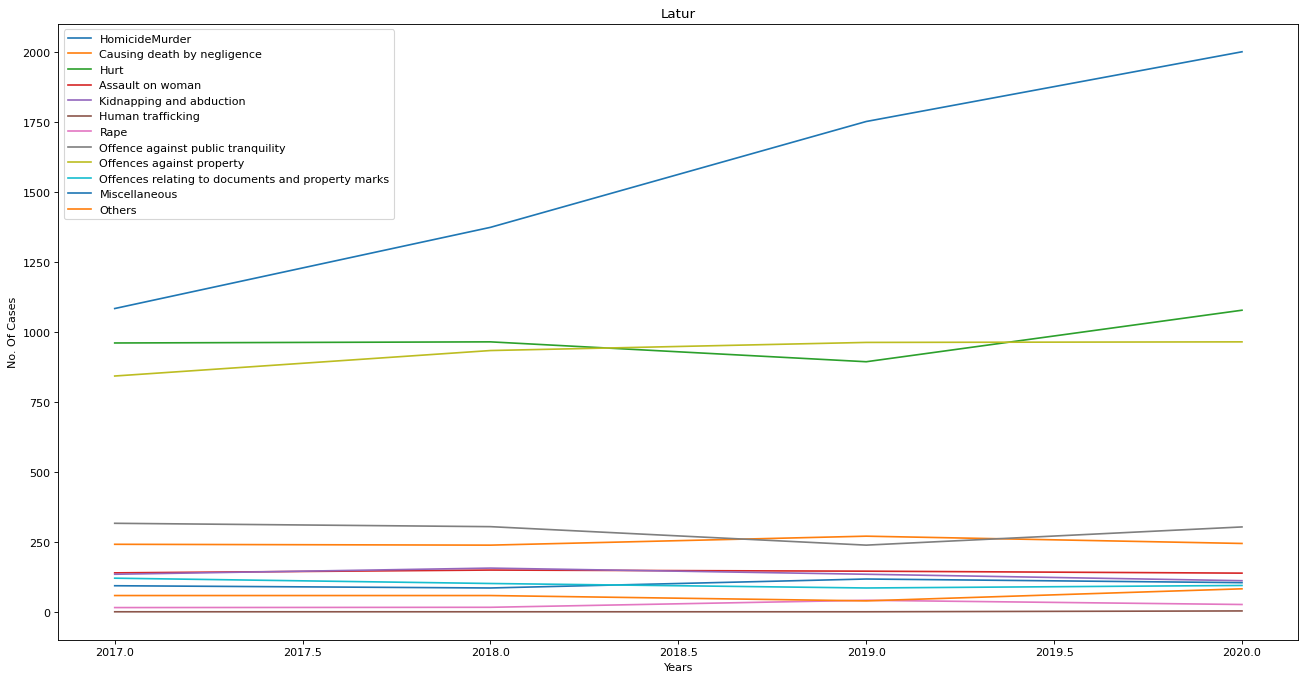

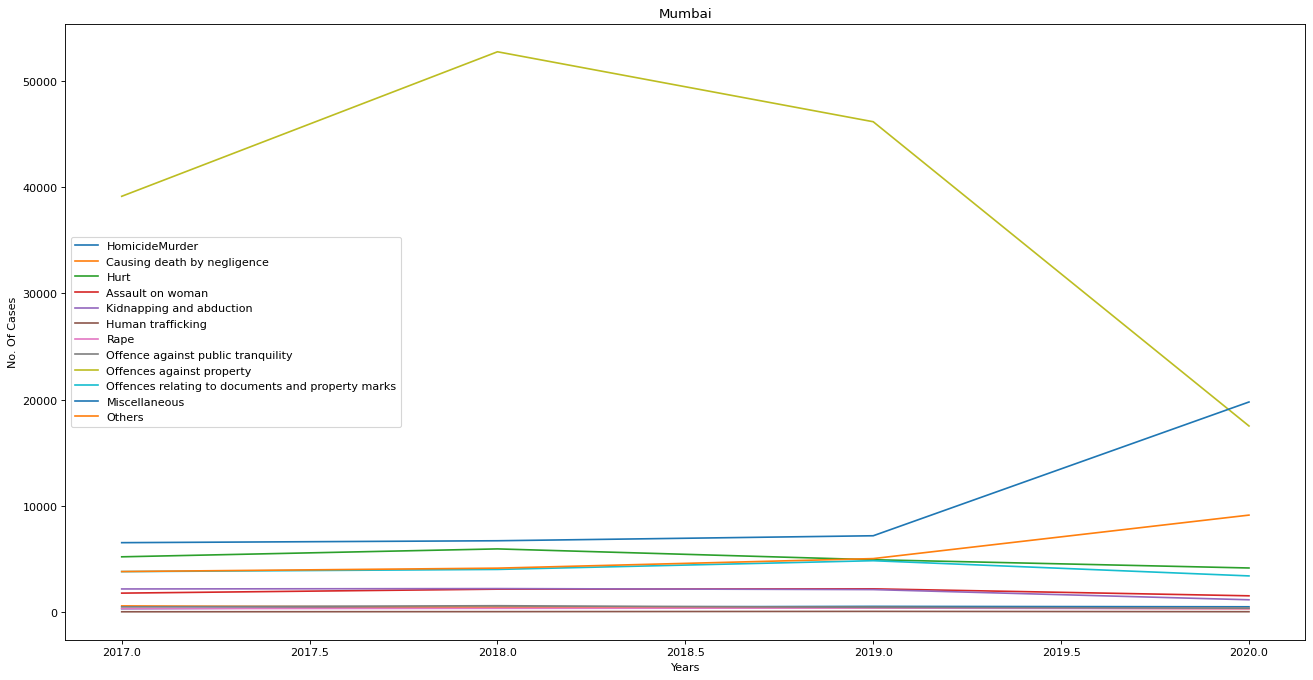

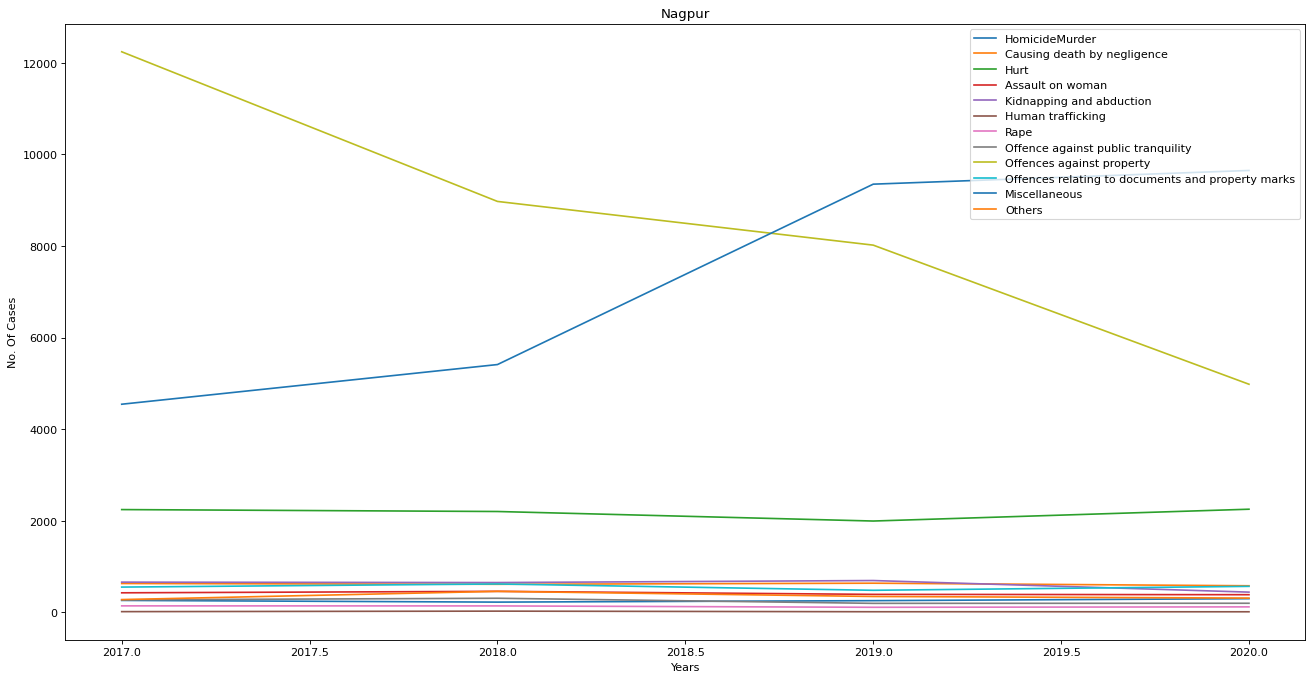

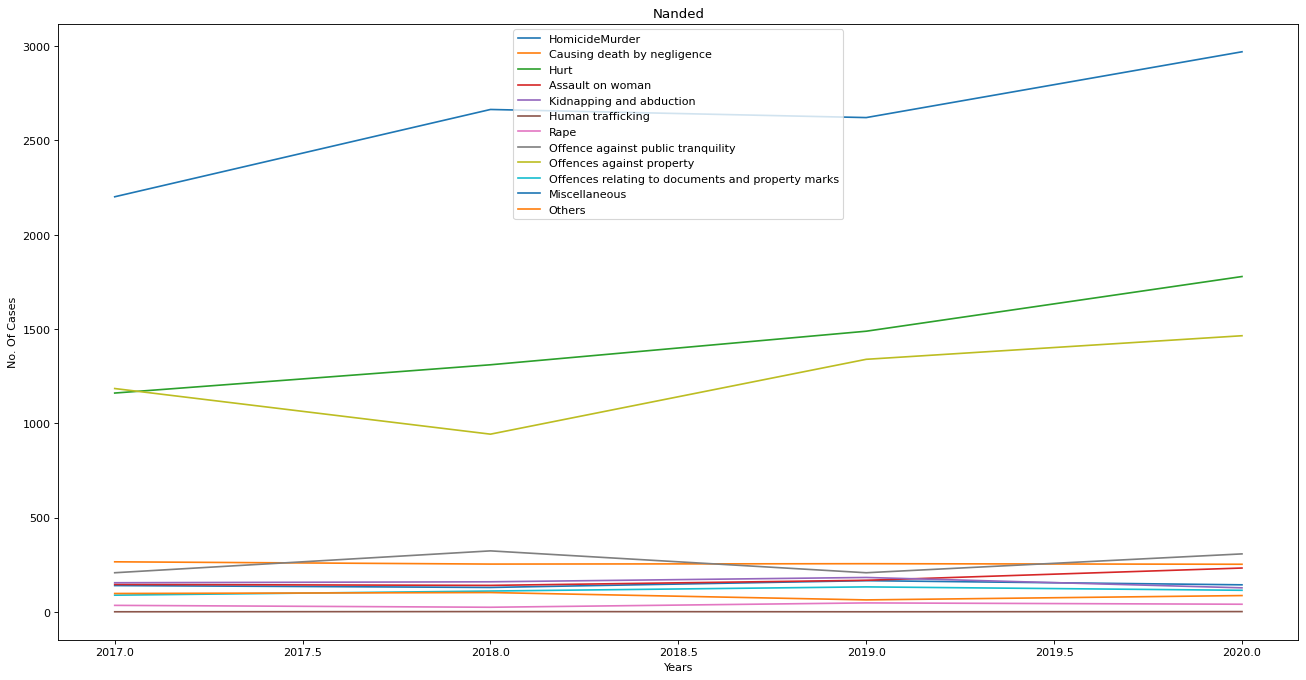

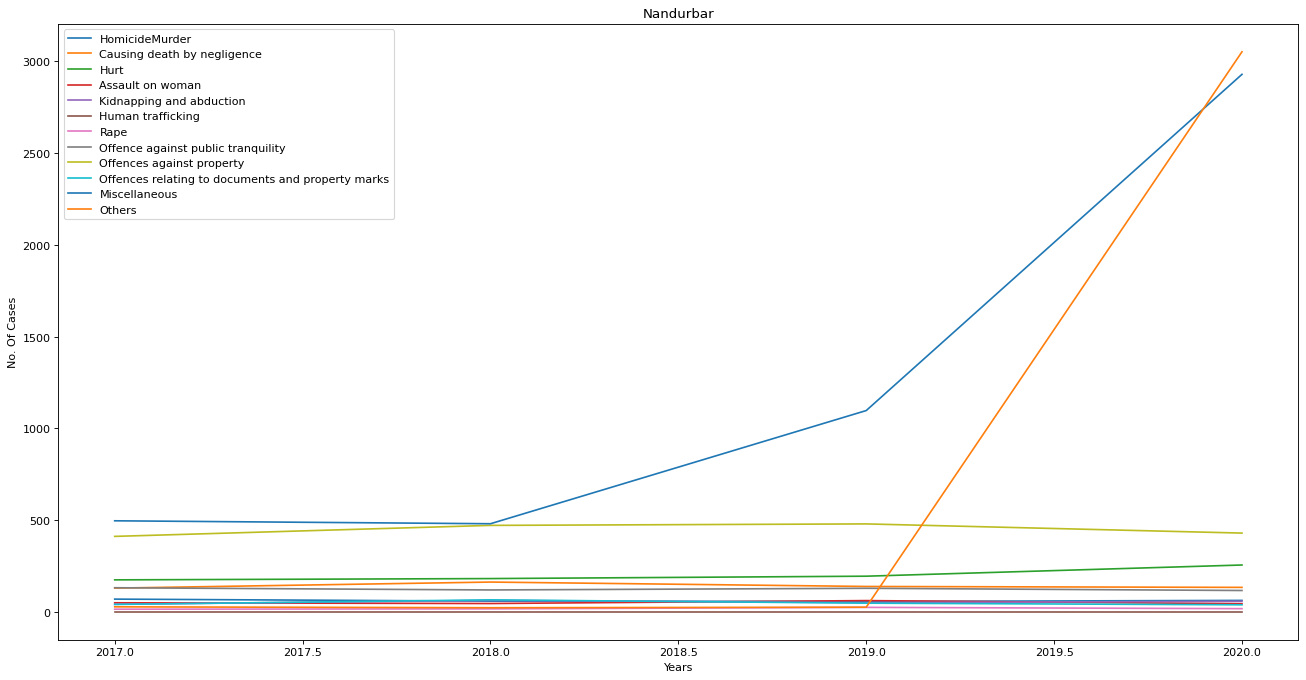

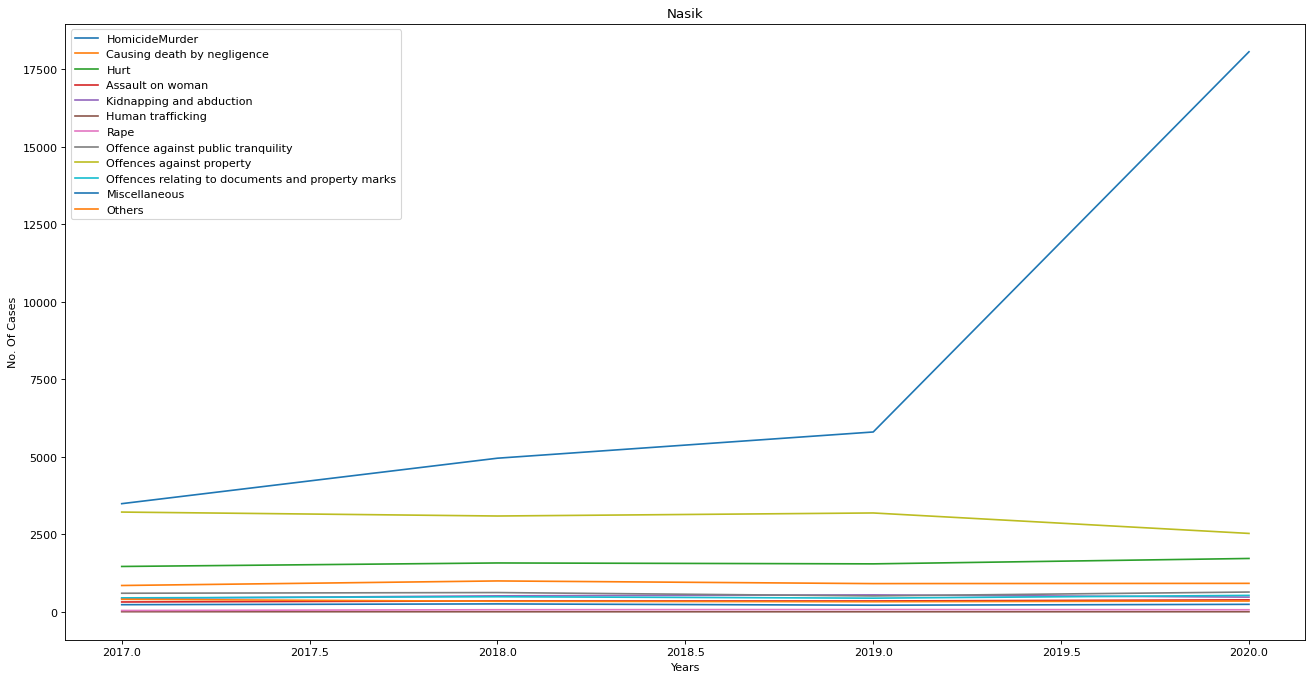

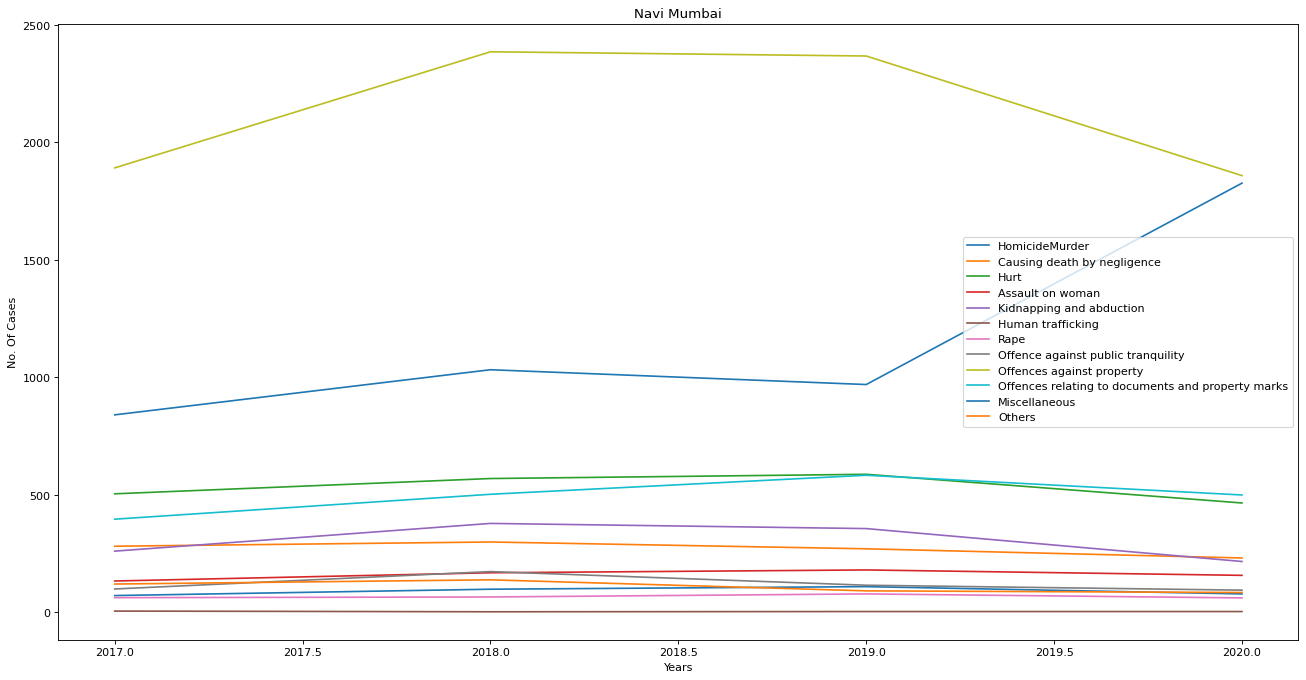

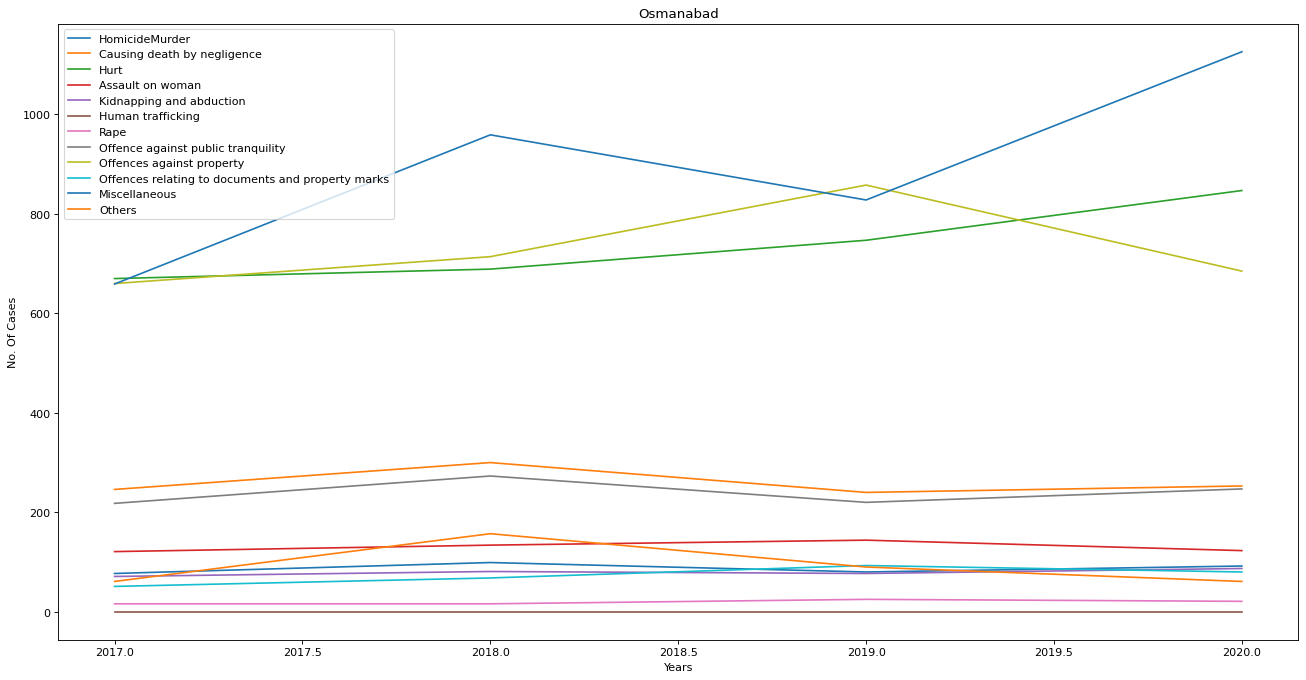

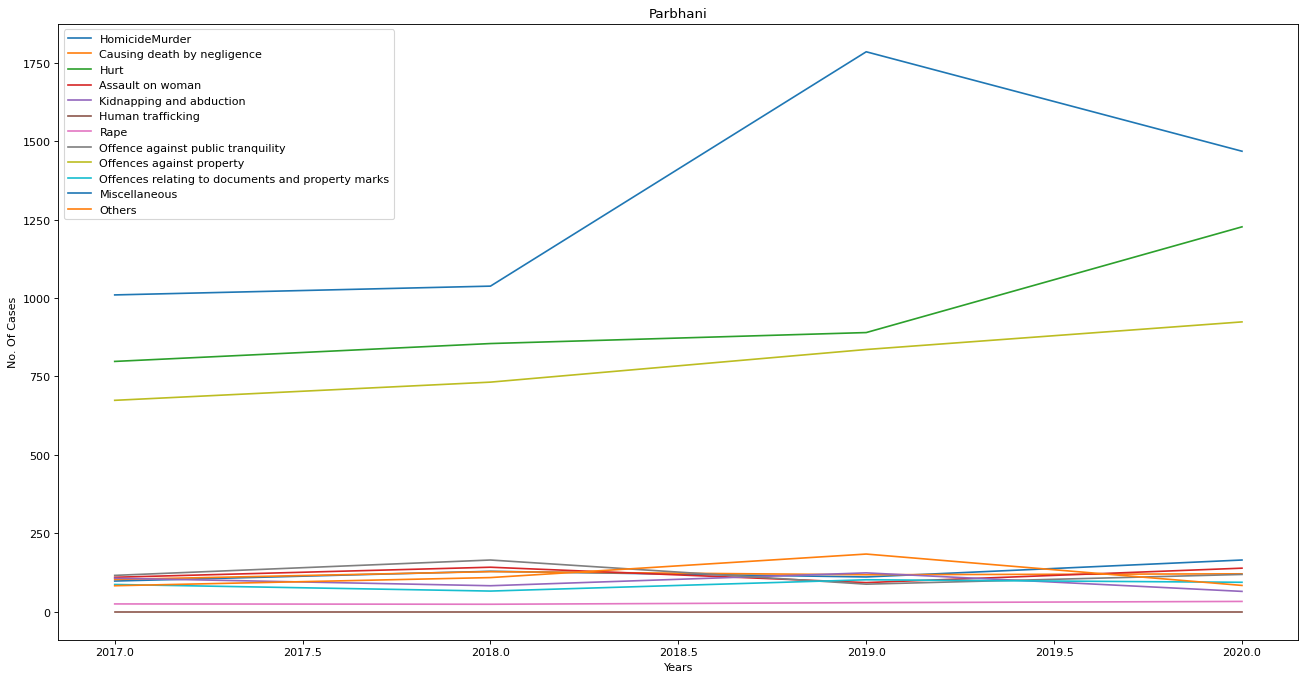

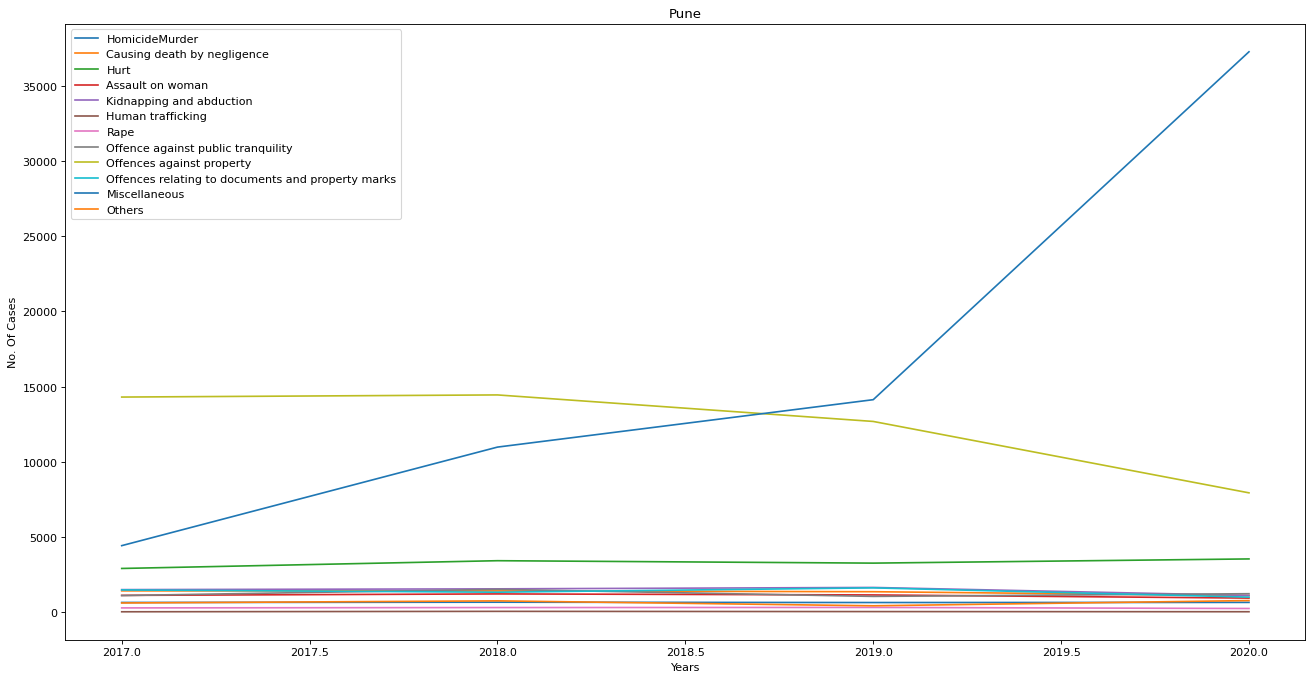

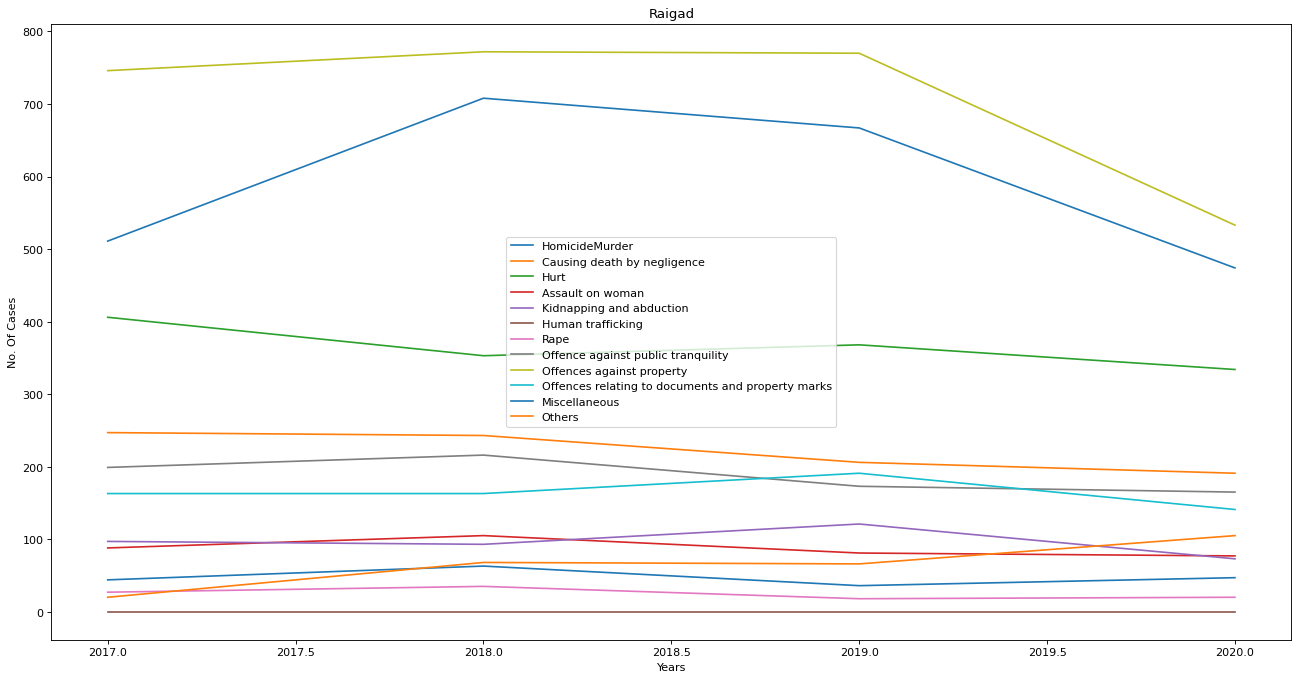

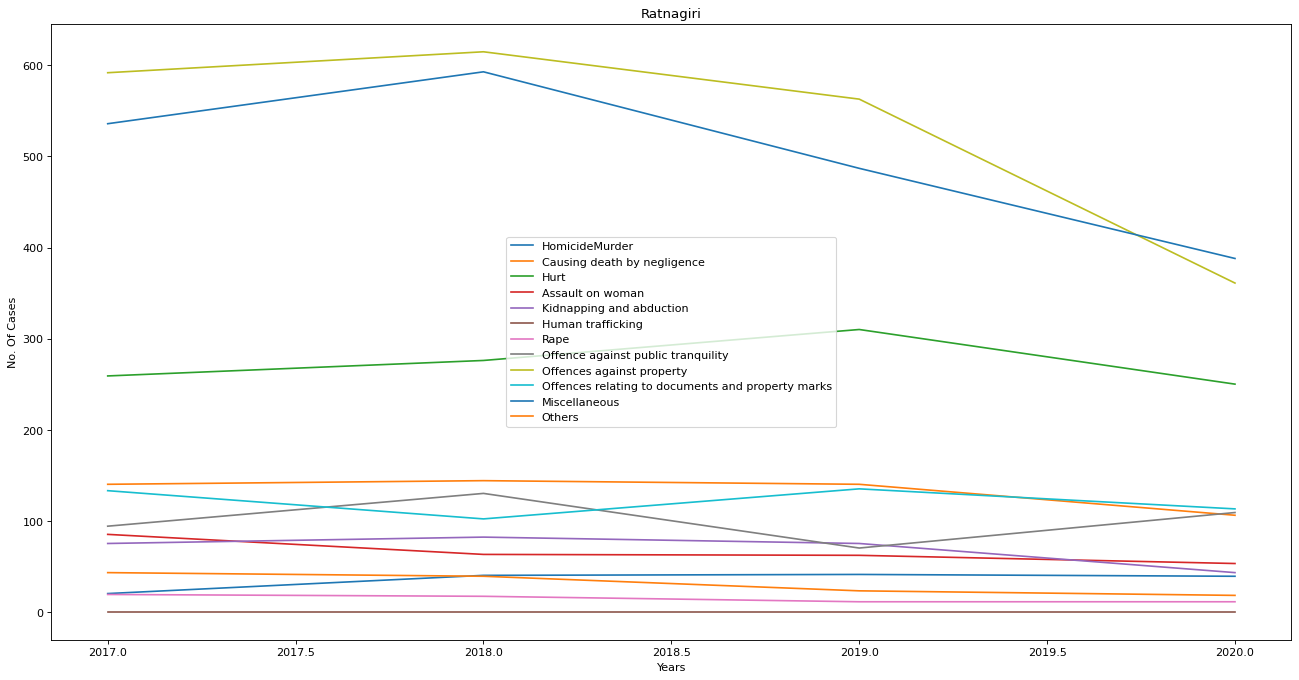

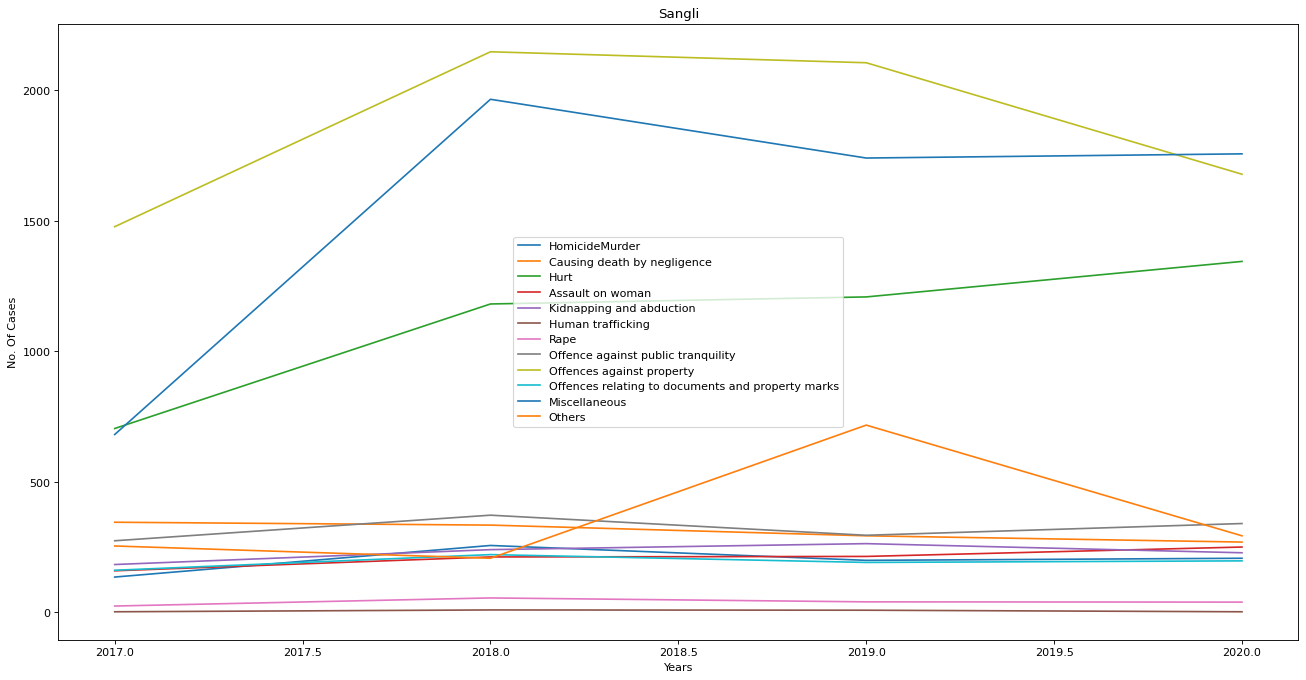

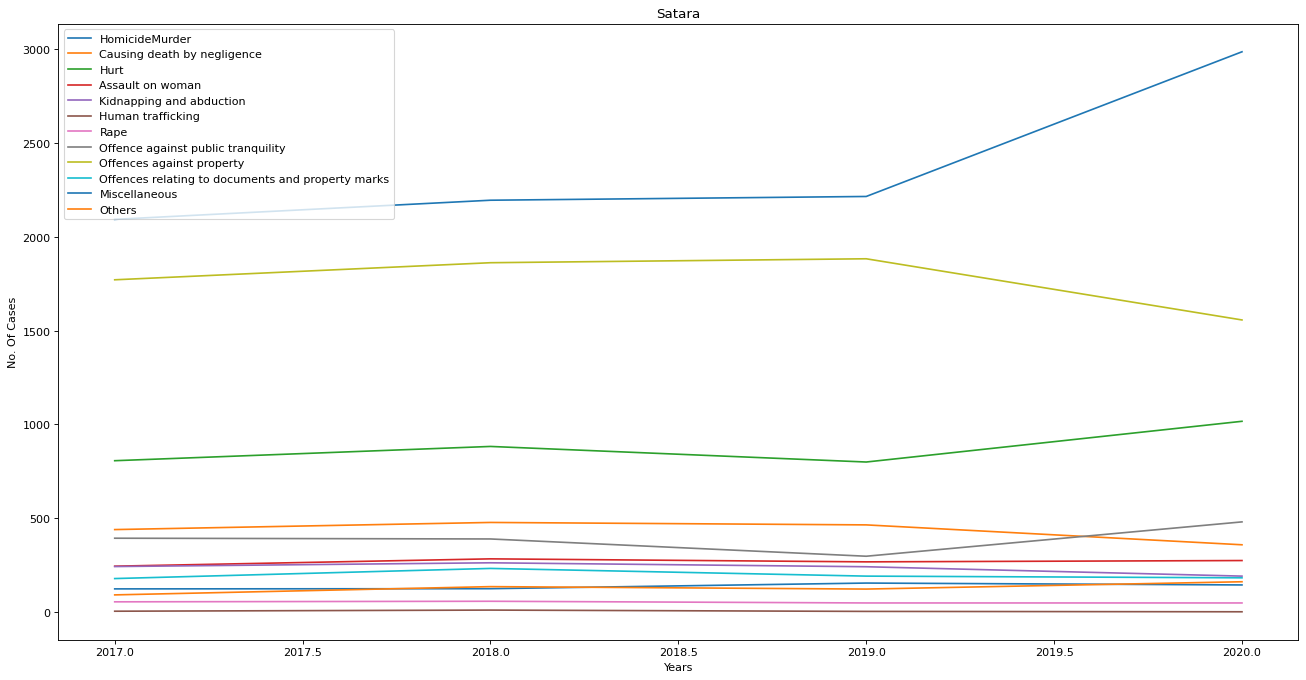

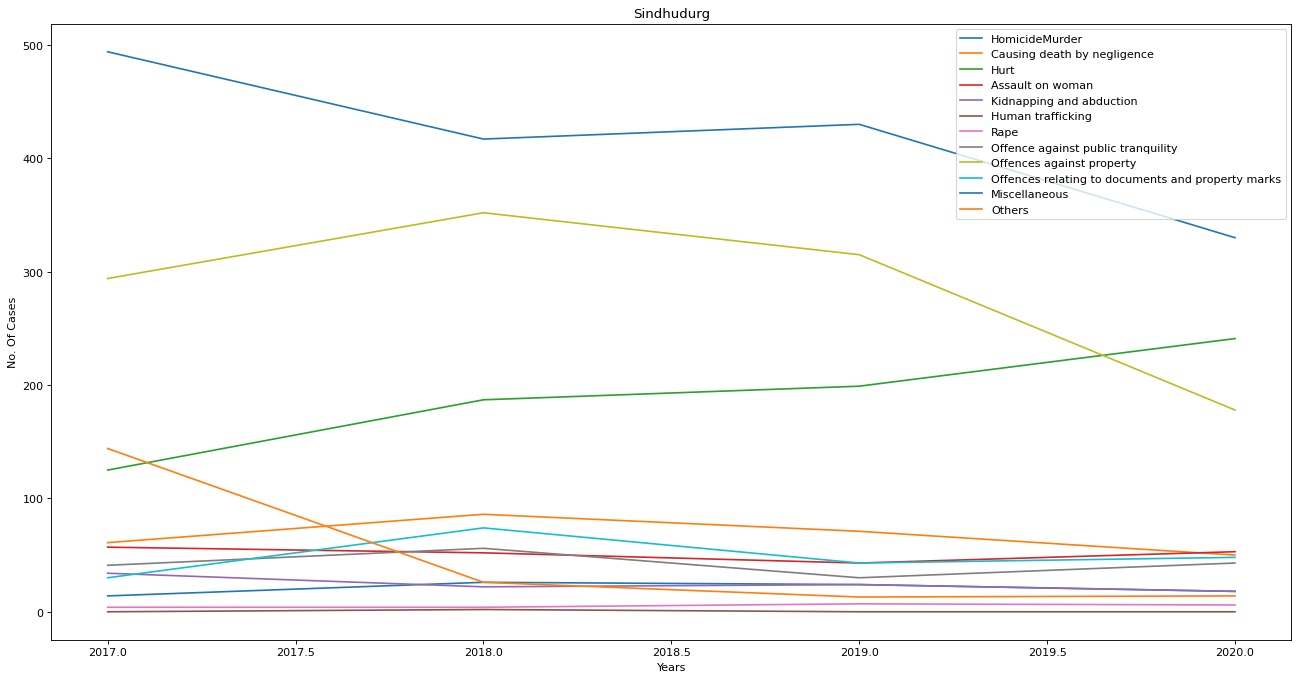

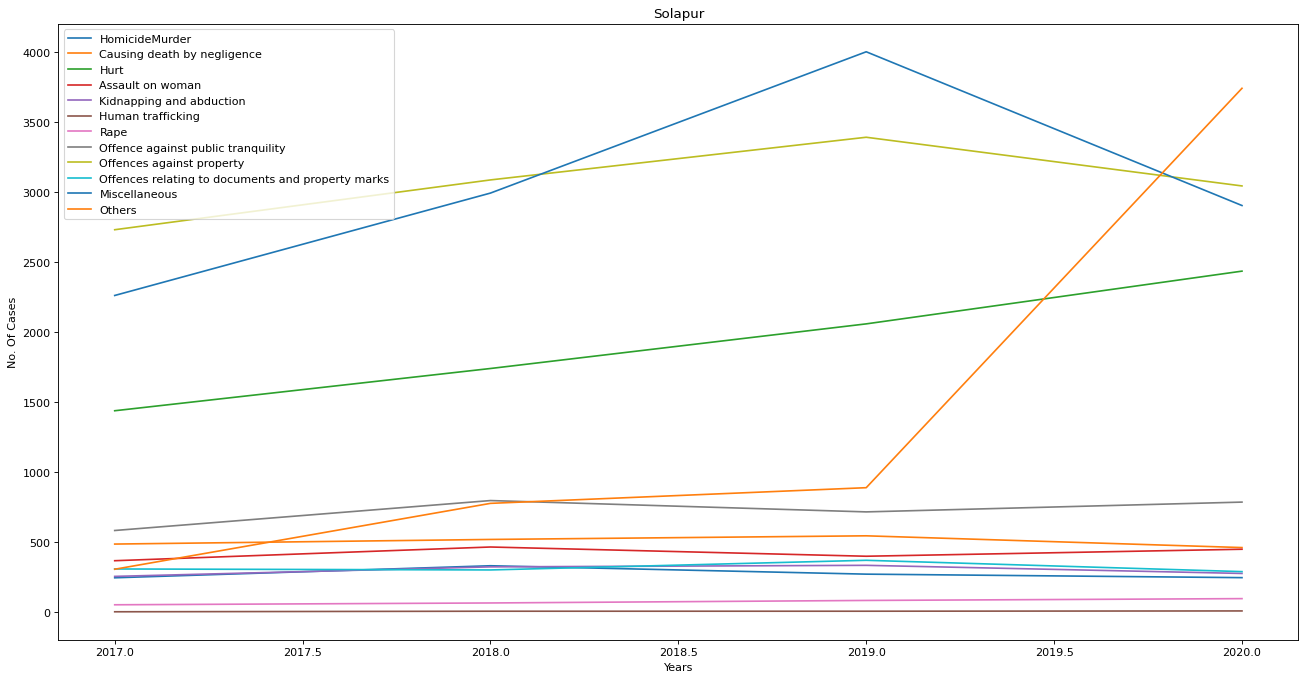

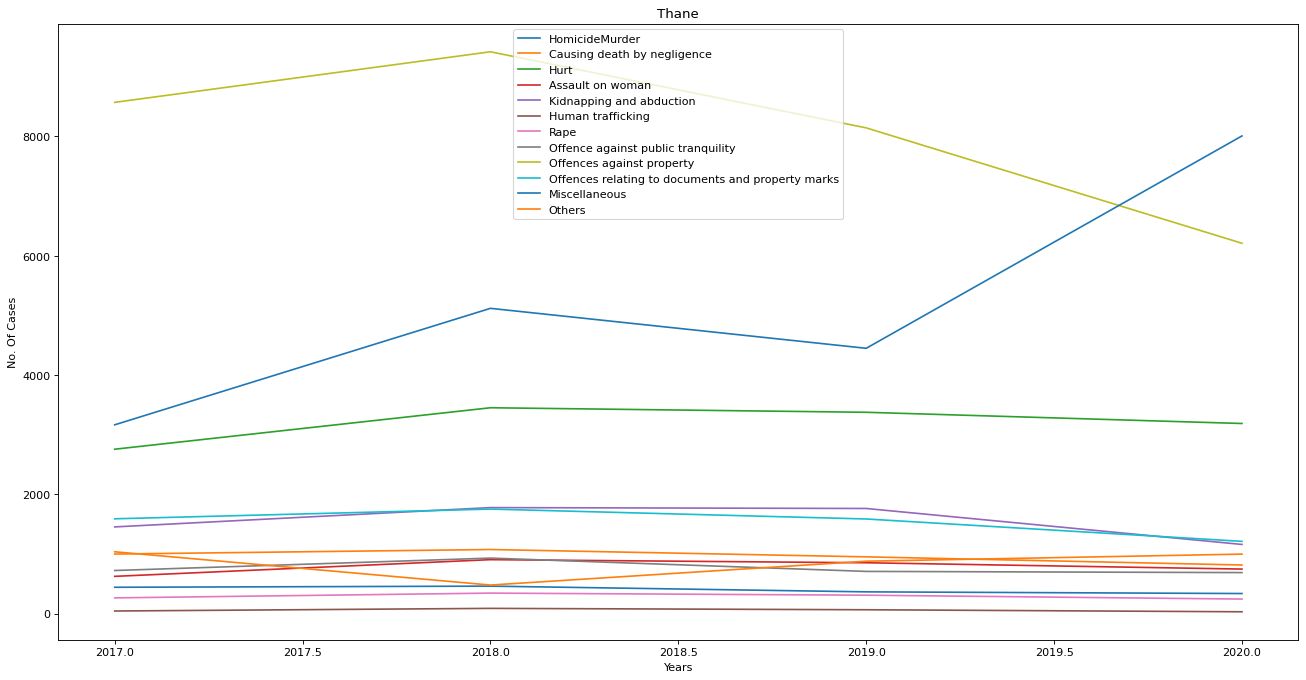

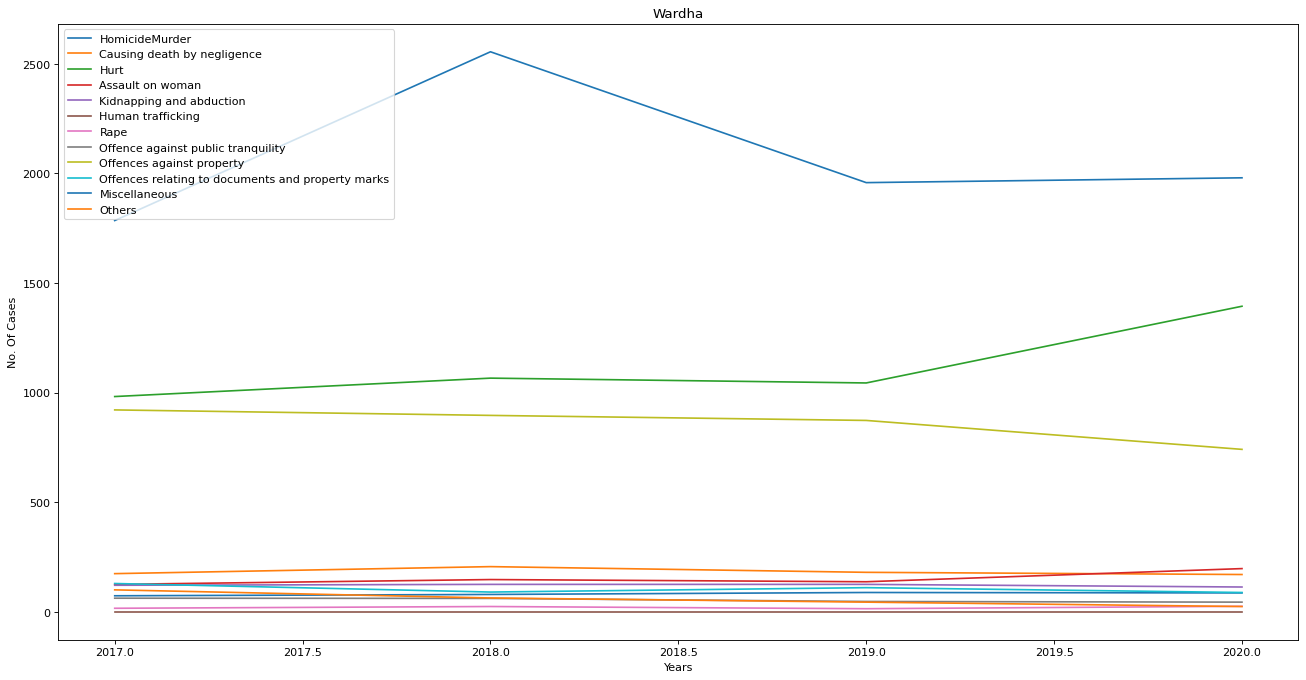

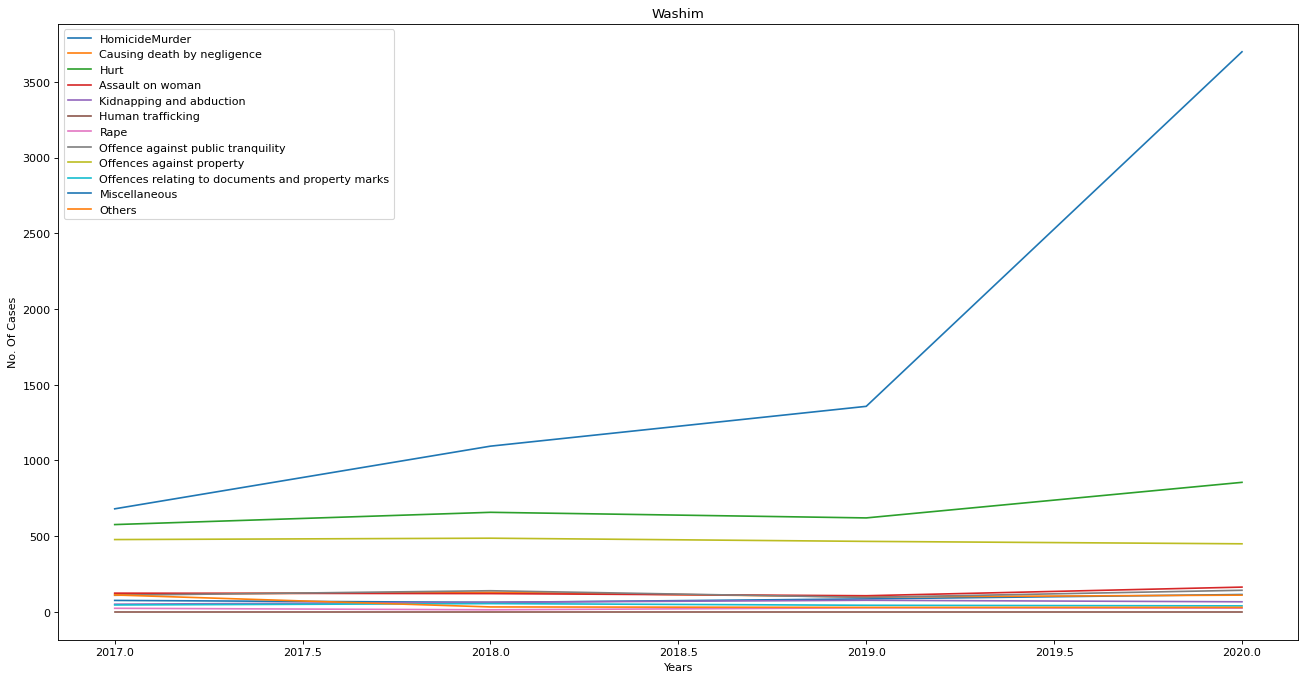

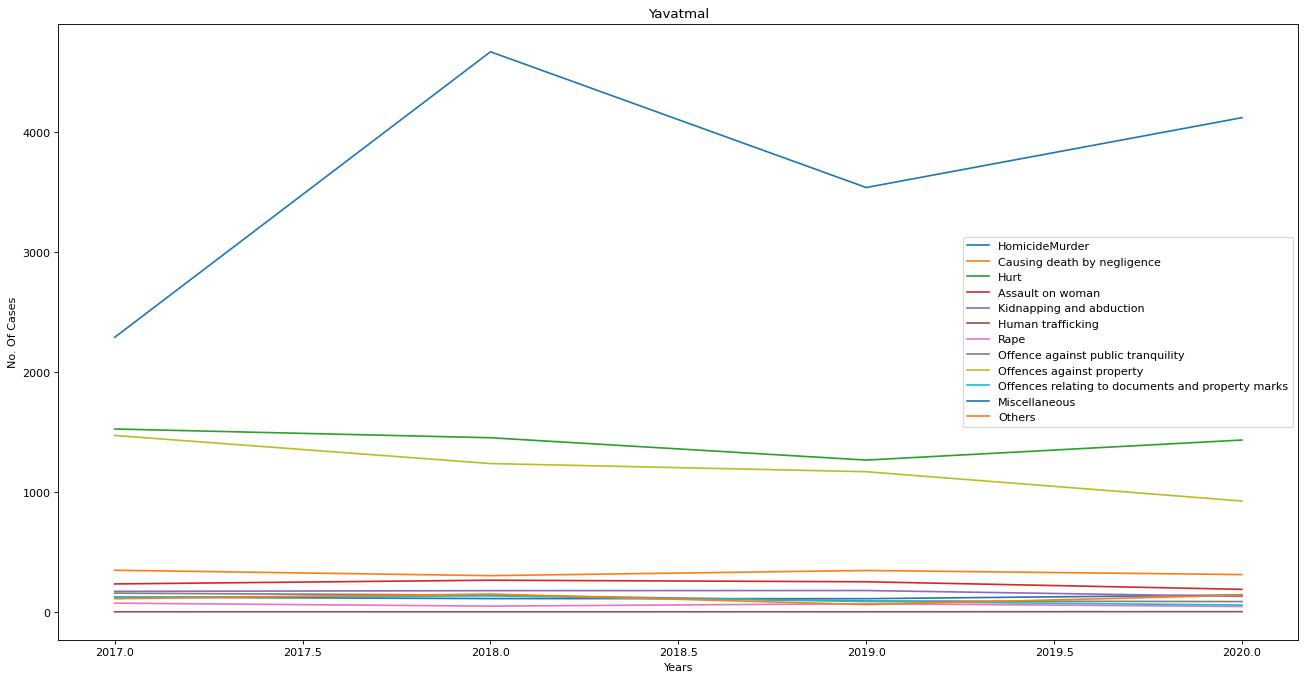

In [33]:
#District vs Crime in 4 yrs
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='practice')
df2=df.iloc[:,0:6]
years=[2017,2018,2019,2020]
Districts=df['District'].unique()
Crimes=df['Crime'].unique()
for district in Districts:
    fig=plt.figure(figsize=(20,10),dpi=80,facecolor='w',edgecolor='k')
    plt.title(district)
    plt.xlabel('Years')
    plt.ylabel('No. Of Cases')
    for case in Crimes:
        temp_df=df[(df['District']==district)&(df['Crime']==case)]
        N_cases=[temp_df[c].values[0] for c in years]
        plt.plot(years,N_cases)
        plt.legend(Crimes)

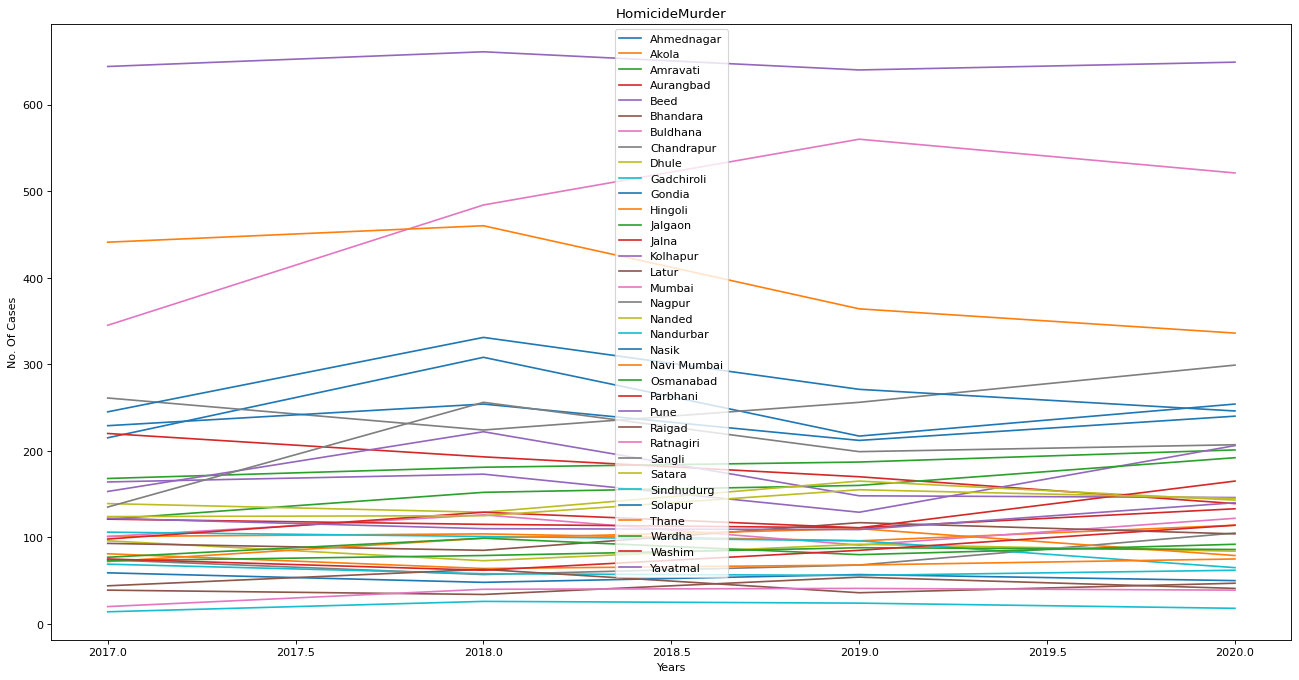

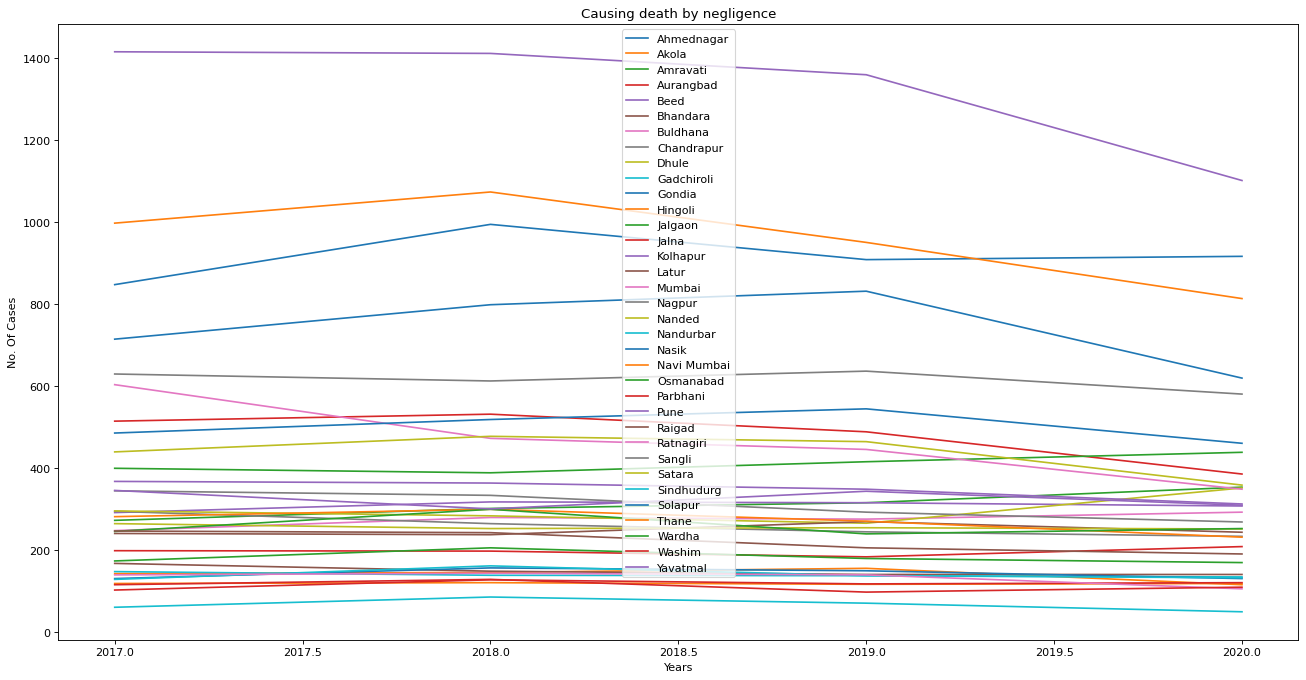

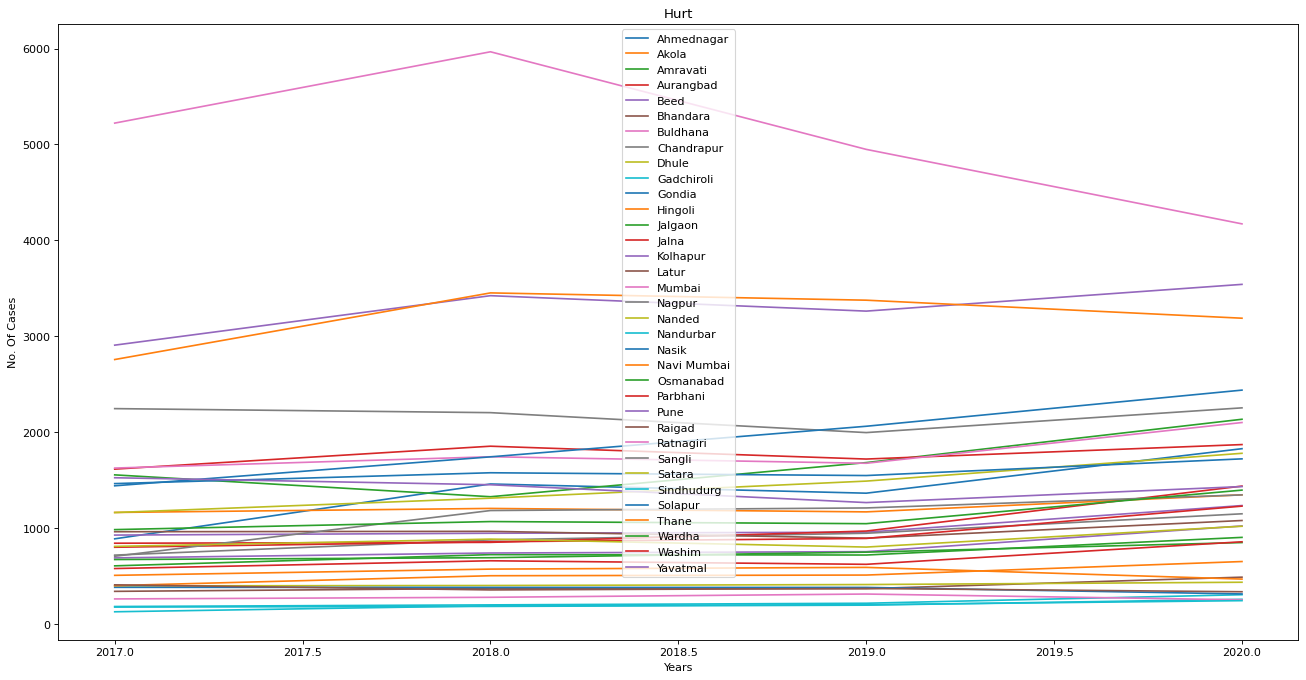

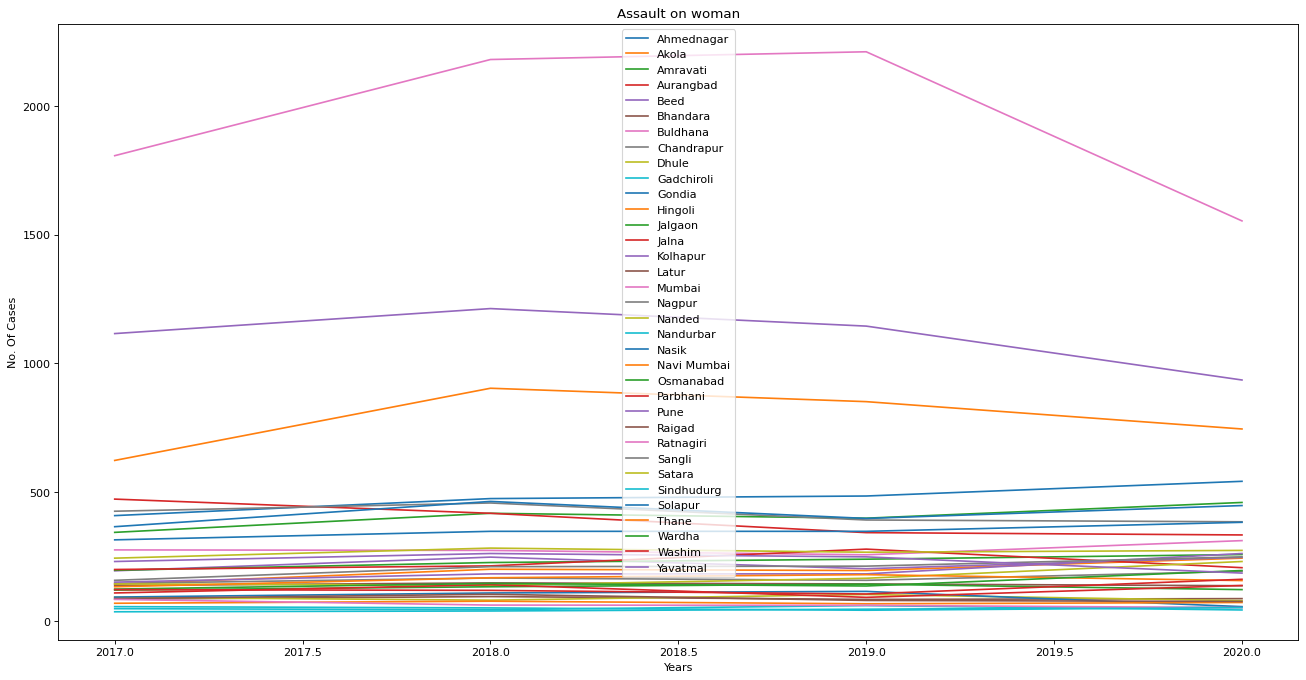

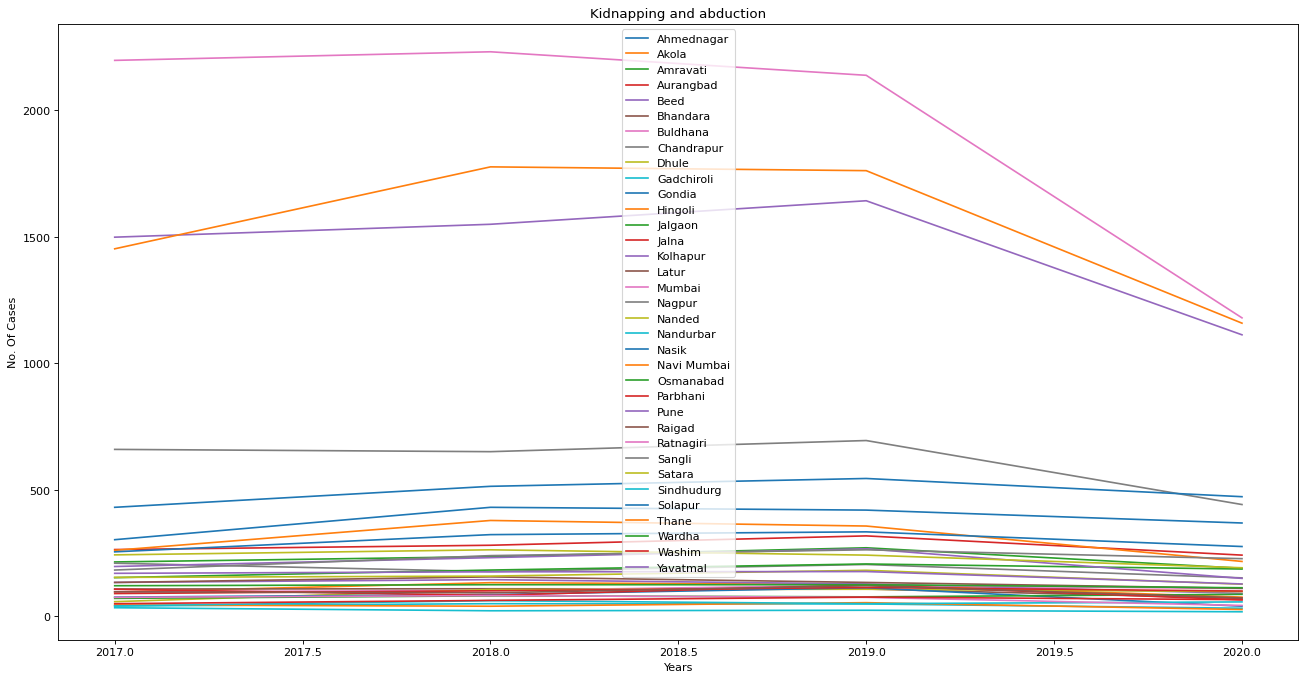

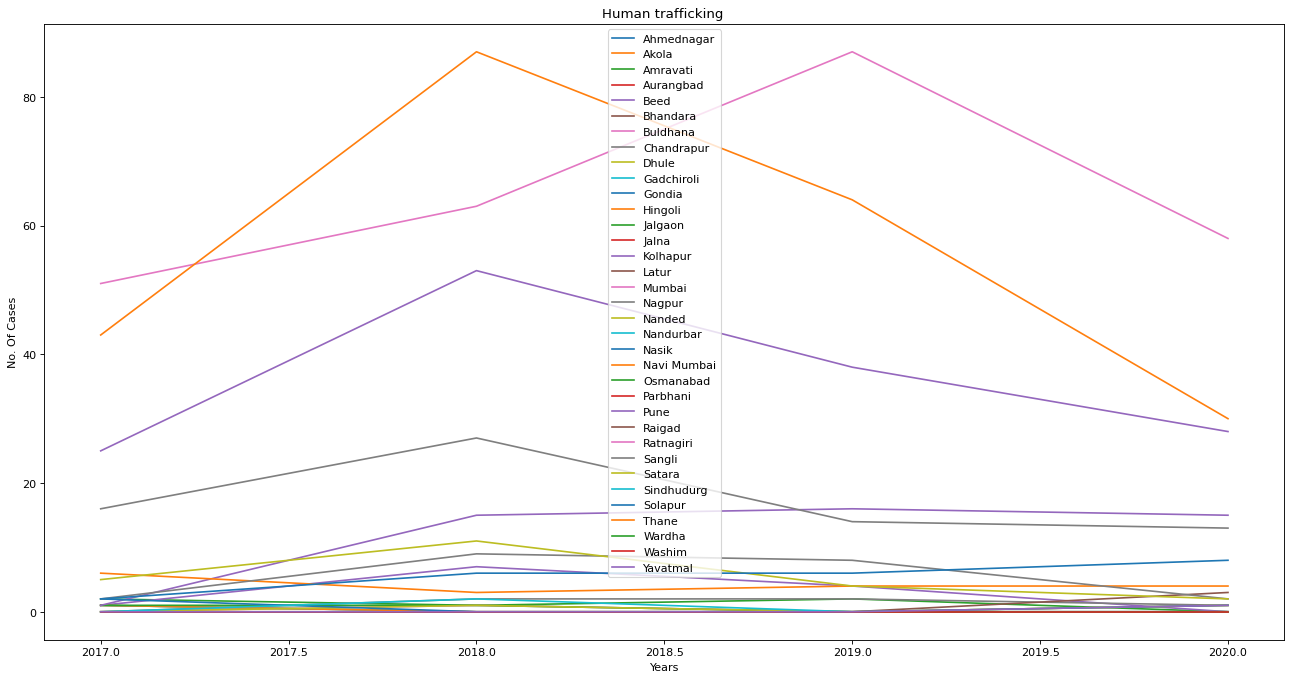

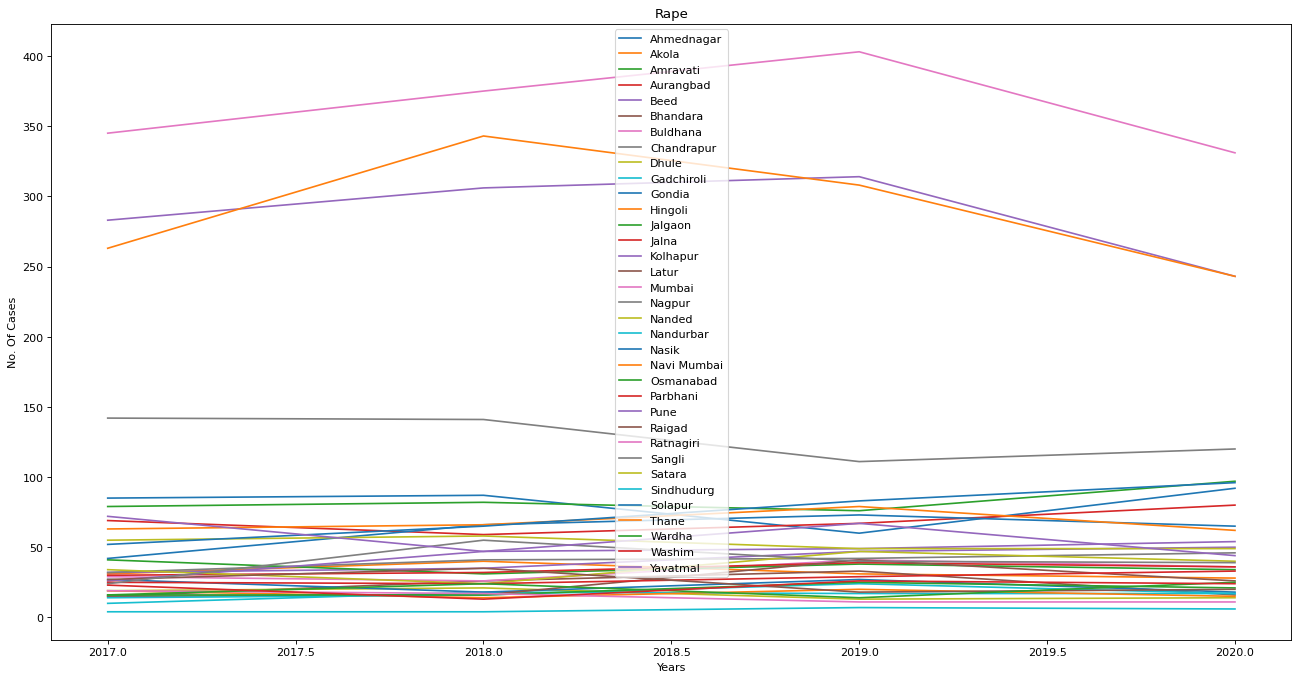

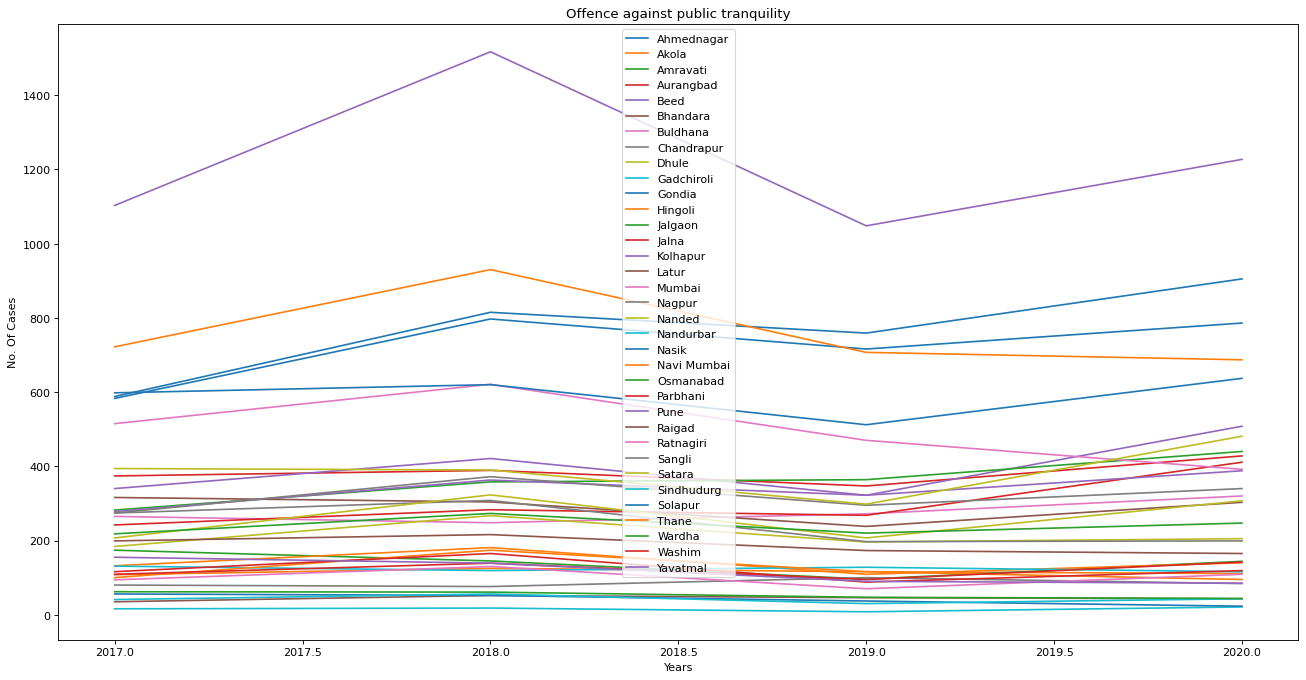

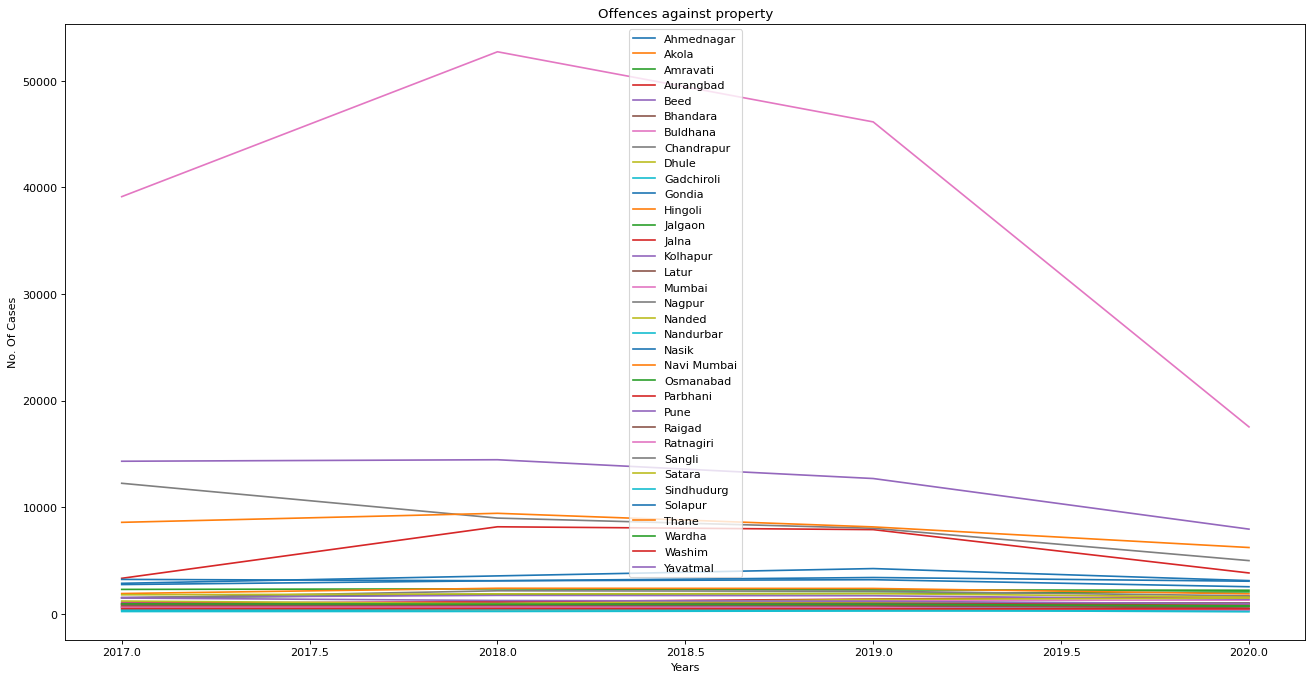

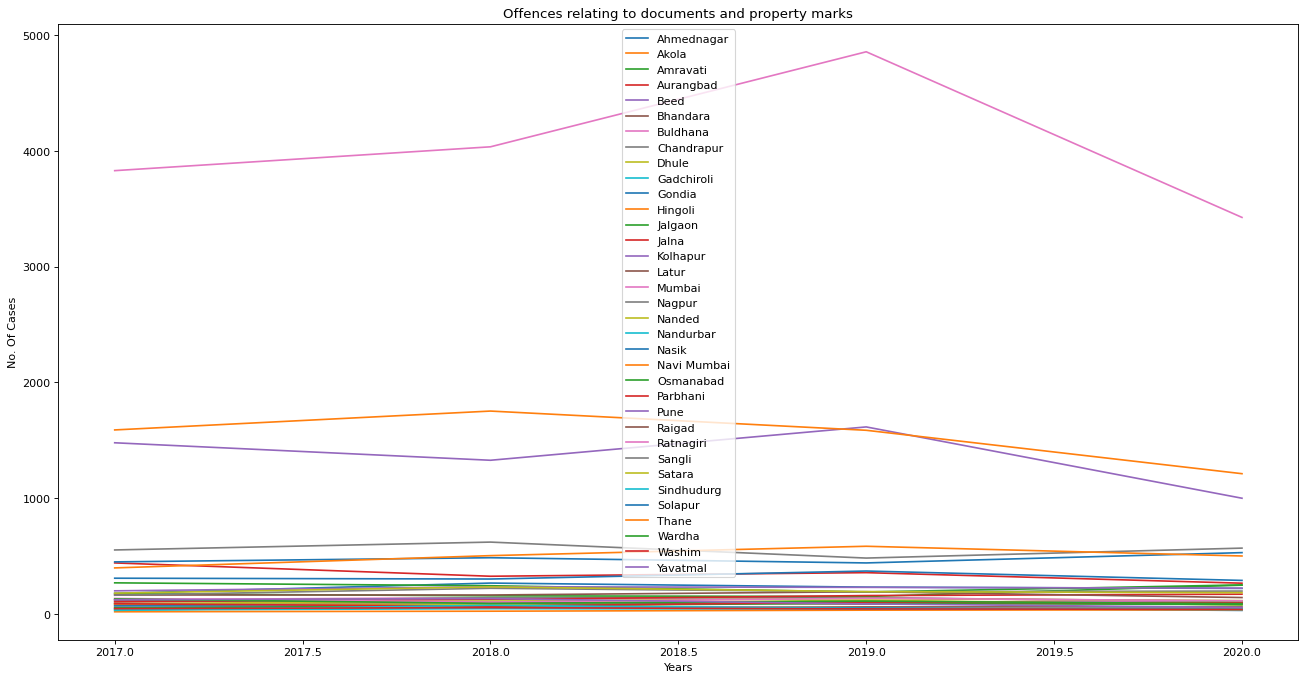

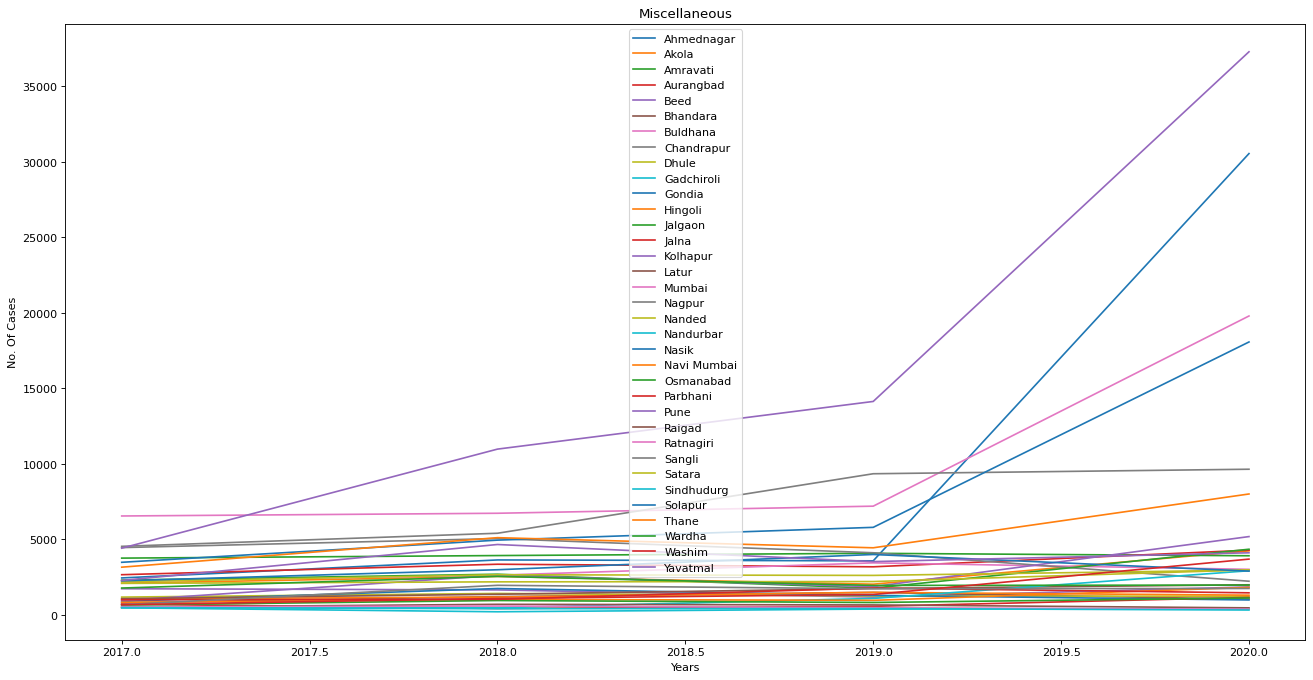

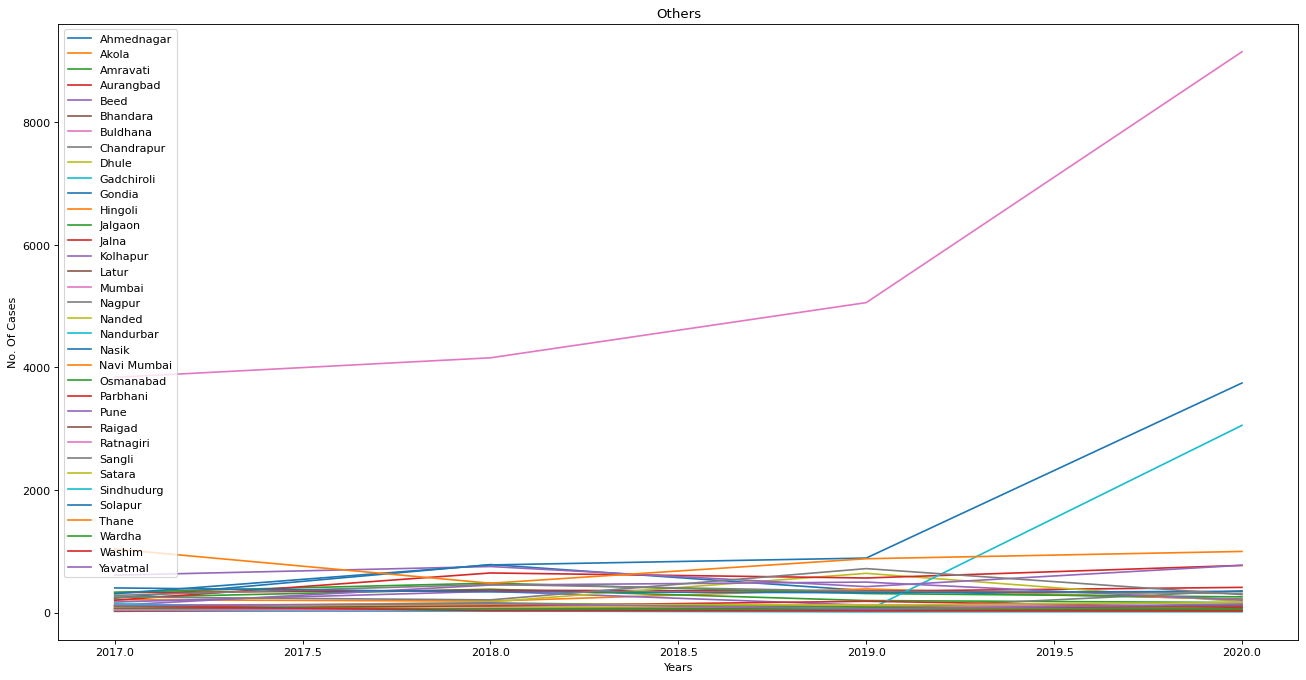

In [34]:
#Crime vs Time(4yrs) for all district
for Crime in Crimes:
    fig=plt.figure(figsize=(20,10),dpi=80,facecolor='w',edgecolor='k')
    plt.title(Crime)
    plt.xlabel('Years')
    plt.ylabel('No. Of Cases')
    for district in Districts:
        temp_df=df[(df['District']==district)&(df['Crime']==Crime)]
        N_cases=[temp_df[c].values[0] for c in years]
        plt.plot(years,N_cases)
        plt.legend(Districts)